# ViEWS transforms example notebook

## This notebook is for users of the legacy system hosted on _hermes_

## Please check 

## (i) that you have a version of viewser <6.0.0

In [1]:
!viewser --version

5.14.1


If this is not the case, downgrade to viewser v 5.14.1

## (ii) that the REMOTE_URL is set to http://views.pcr.uu.se/hermes

In [2]:
!viewser config list


  |:---------------------------------|:-----------------------------------------------------------------------------------------|
  | RETRY_FREQUENCY                  | 5                                                                                        |
  | LOG_LEVEL                        | INFO                                                                                     |
  | HANDSHAKE_PATH                   |                                                                                          |
  | REPO_URL                         | https://www.github.com/prio-data/viewser                                                 |
  | LATEST_KNOWN_VERSION             | 0.0.0                                                                                    |
  | NOTEBOOK_SERVER_IMAGE_REPOSITORY | prio-data/viewserspace                                                                   |
  | NOTEBOOK_SERVER_IMAGE_REGISTRY   | viewsregistry.azurecr.io                          

If this is not the case, in the terminal execute

viewser config set REMOTE_URL http://views.pcr.uu.se/hermes 

and **restart the notebook kernel** (sometimes closing an reopening the notebook may be needed) 

# Transforms in ViEWS

Transforms in viewser are done using the .with_column method, by first retrieving the raw feature from the database and executing the required transforms in __top-to-bottom order__. 

This means that, if you want to compute 

transformed_feature=transform_C(transform_B(transform_A(raw_feature))), 

you would have a .with_column statement looking like this:

                 .with_column(Column("transformed_feature_name", from_table = "table_name", from_column = "raw_feature")
                         .transform_A()
                         .transform_B()
                         .transform_C()

# The ViEWS transformation library

There are many available transforms and new ones are still being added. This notebook contains an example of every transform in the library, in most cases with some exploration of the effects of variying the paramers that most of the transforms accept to control what they do.

Before we start, import the Queryset and Column methods from viewser, the utilities module from the views transformation library (if you don't have this, you can install it in your viewser environment by doing 

pip install views-tranform-library

), and also matplotlib numpy and pandas: 

In [4]:
from viewser import Queryset, Column
from views_transformation_library import utilities
import ingester3
from ingester3.Country import Country

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 12]

We need to set some standard time limits, select some standard tables and columns, and choose a particular country and priogrid cell to help compare transformed features to raw features:

In [5]:
t0=200
t1=300

times=range(t0,t1)

cm_table="ged2_cm"
cm_column="ged_sb_best_sum_nokgi"

countryid=237 # Kenya

pgm_table="ged2_pgm"
pgm_column="ged_sb_best_count_nokgi"

pgid=135787

## Raw features for use in comparisons

First, we will pick up some raw data. Some transforms work on any kind of data, but some (especially the __spatial transforms__) can only by used at a particular spatial unit of analysis, so we will fetch some country-level data, and some pg-level data.

Fetch a single feature with NaNs removed, but otherwise untransformed, at __country-month__ level from the database:

In [6]:
queryset = (Queryset("jim_transform_test_raw_cm", "country_month")
 
            # target variable
            .with_column(Column("ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                        )
            )       

In [7]:
data_raw_cm = queryset.publish().fetch()
print(data_raw_cm)

 .      o                        ged_sb
month_id country_id        
1        1              0.0
         2              0.0
         3              0.0
         4              0.0
         5              0.0
...                     ...
852      242            0.0
         243            0.0
         244            0.0
         245            0.0
         246            0.0

[158230 rows x 1 columns]


Fetch a single feature with NaNs removed, but otherwise untransformed, at __pg-month__ level from the database:

In [8]:
queryset = (Queryset("jim_transform_test_raw_pgm", "priogrid_month")
 
            # target variable
            .with_column(Column("ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                        )
            ) 

In [9]:
data_raw_pgm = queryset.publish().fetch()
print(data_raw_pgm)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O                        ged_sb
month_id priogrid_gid        
1        62356            0.0
         79599            0.0
         79600            0.0
         79601            0.0
         80317            0.0
...                       ...
852      190496           0.0
         190507           0.0
         190508           0.0
         190510           0.0
         190511           0.0

[11169720 rows x 1 columns]


## Finding what transforms are available in viewser

To see what transforms are currently available, execute

In [10]:
# Show a list of available transforms
!viewser transforms list


  > Transforms
  ---------------------------------------------------------
  | name           | path                               |
  |:---------------|:-----------------------------------|
  | rename         | any/util.rename                    |
  | ln             | any/ops.ln                         |
  | gte            | any/bool.gte                       |
  | lte            | any/bool.lte                       |
  | in_range       | any/bool.in_range                  |
  | delta          | any/temporal.delta                 |
  | tlag           | any/temporal.tlag                  |
  | tlead          | any/temporal.tlead                 |
  | moving_average | any/temporal.moving_average        |
  | moving_sum     | any/temporal.moving_sum            |
  | cweq           | any/temporal.cweq                  |
  | time_since     | any/temporal.time_since            |
  | decay          | any/temporal.decay                 |
  | onset_possible | any/temporal.onset_possible      

This prints a list of transforms organised by topic.

<a id='Menu'></a>
# Menu of transforms

Follow the hyperlinks to go the transforms. Click on the 'Menu' links to come back here. 

[util.rename](#util.rename)

[ops.ln](#ops.ln)

[bool.gte](#bool.gte)

[bool.lte](#bool.lte)

[bool.in_range](#bool.in_range)

[temporal.delta](#temporal.delta)

[temporal.tlag](#temporal.tlag)

[temporal.tlead](#temporal.tlead)

[temporal.moving_average](#temporal.moving_average)

[temporal.moving_sum](#temporal.moving_sum)

[temporal.cweq](#temporal.cweq)

[temporal.time_since](#temporal.time_since)

[temporal.decay](#temporal.decay)

[temporal.onset_possible](#temporal.onset_possible)

[temporal.onset](#temporal.onset)

[temporal.treelag](#temporal.treelag)

[unit.mean](#unit.mean)

[unit.demean](#unit.demean)

[unit.rollmax](#unit.rollmax)

[missing.replace_na](#missing.replace_na)

[missing.fill](#missing.fill)

[missing.extrapolate](#missing.extrapolate)

[spatial.lag](#spatial.lag)

[spatial.treelag](#spatial.treelag)

[spatial.spacetime_distance](#spatial.spacetime_distance)

[spatial.countrylag](#spatial.countrylag)

It is also possible to get information from viewser on a specific transform, including what parameters it expects. To request information on, for example, the missing.fill transform, execute:

In [12]:
!viewser transforms show any/missing.fill


  >> Function description

  Docstring:
  "Fill column in dataframe with optional direction and area.
  
  Args:
      s: Pandas series to apply filling to.
      limit_direction: Direction in which to fill.
      limit_area: Area to fill. Default None refers to the entire series."
   
  Missing.fill takes 2 argument(s):
  - limit_direction (typing.Literal['forward', 'backward', 'both'])
  - limit_area (typing.Union[typing.Literal['inside', 'outside'], NoneType])
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------------------------------



The missing.fill transform takes two optional arguments, controlling in which direction filling is done, and whether to restrict filling to the range of valid data, or to fill the whole dataframe from beginning to end.

If no arguments are supplied, the whole dataframe is forward-filled, and then backward-filled.

The dataframe has now been filled with valid values from beginning to end.

The raw feature in the chosen geographical unit over the whole dataframe time-series looks like this: 

Text(0, 0.5, 'feature')

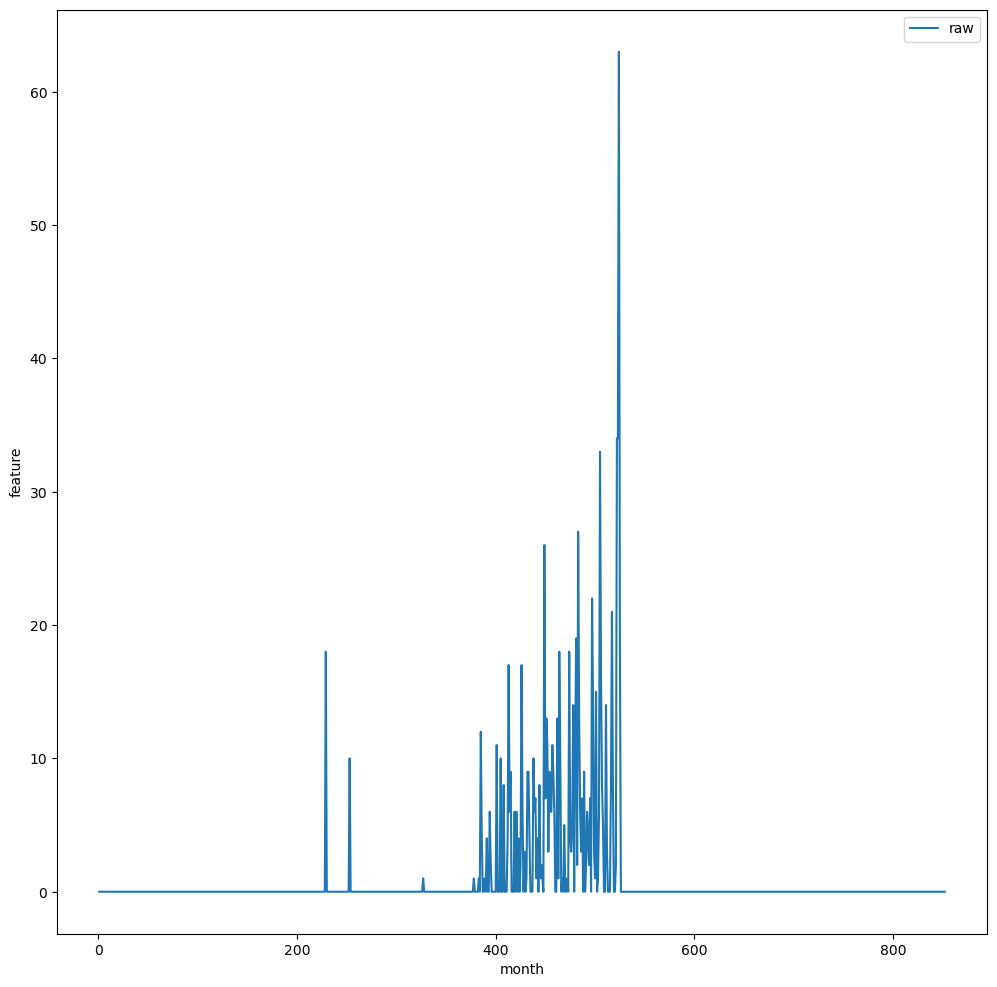

In [14]:
indx=data_raw_cm.index

tmin=indx.min(axis=0)
tmax=indx.max(axis=0)
tmin=tmin[0]
tmax=tmax[0]+1

times_full=range(tmin,tmax)

plt.plot(times_full,data_raw_cm.loc[(slice(None), countryid), :].values.reshape(len(times_full)))
plt.legend(['raw',])
plt.xlabel('month')
plt.ylabel('feature')

<a id='util.rename'></a>
## util.rename

This is an internal utility function which you will never need to use, so we can skip it :)

[Menu](#Menu)

<a id='ops.ln'></a>
## ops.ln

Returns the natural log (ln) of (1+feature values), with the '1+' ensuring that zero values of the feature are handled gracefully.

The main purpose of the ln transform is to reduce the dynamic range of the feature.

[Menu](#Menu)

In [15]:
#! Display usage and documentation for a transform
!viewser transforms show any/ops.ln


  >> Function description

  Docstring:
  "Natural log of s+1 "
   
  Ops.ln takes no arguments
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [16]:
queryset = (Queryset("jim_transform_test_ln", "country_month")
 
            # target variable
            .with_column(Column("ln_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.ops.ln()
                        )
            )   

In [17]:
data_ln = queryset.publish().fetch()
print(data_ln)

 .      o                        ln_ged_sb
month_id country_id           
1        1                 0.0
         2                 0.0
         3                 0.0
         4                 0.0
         5                 0.0
...                        ...
852      242               0.0
         243               0.0
         244               0.0
         245               0.0
         246               0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

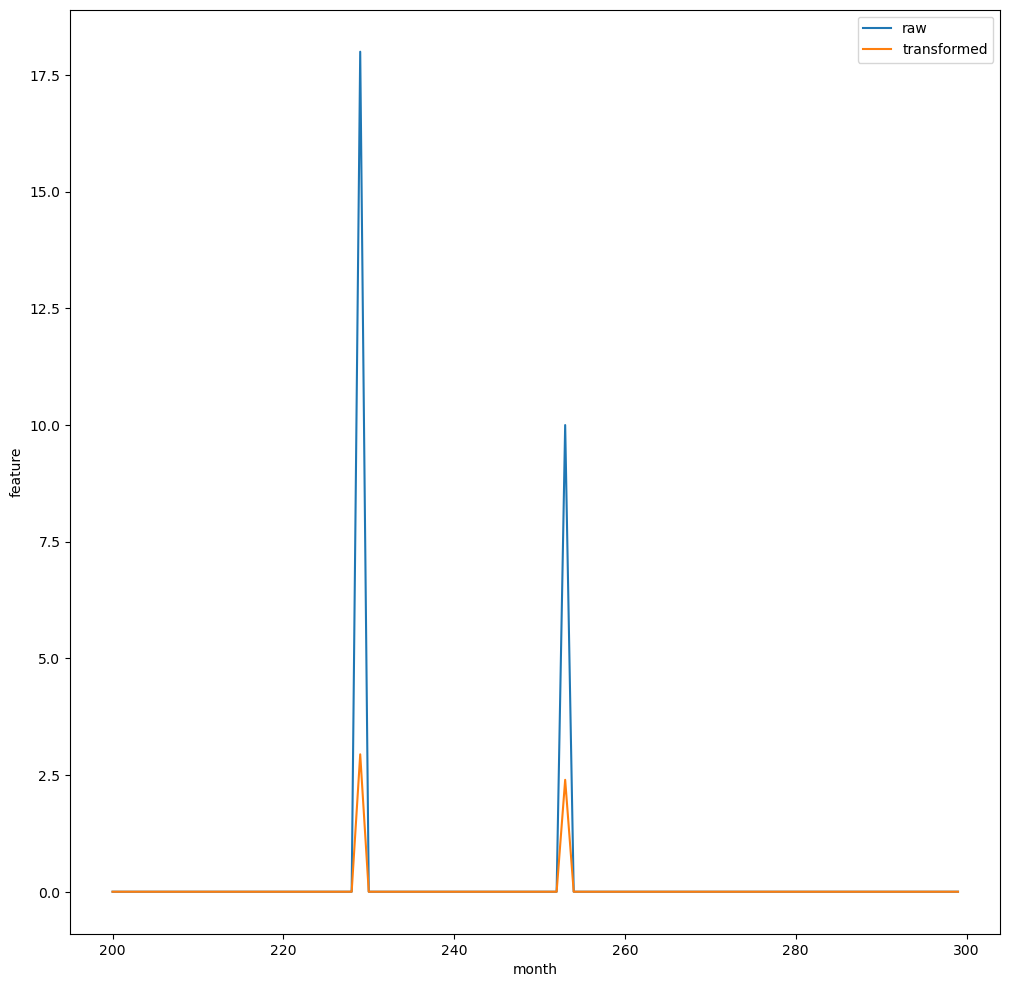

In [18]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_ln.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

Where the original feature had a value of zero, the transformed feature also has a value of zero, the first peak remains higher than the second, but the range of feature values is sharply reduced.

# Boolean transforms

This class of transforms convert real features (with arbitrary values) into dummy or boolean features, whose values can only be 0 or 1.

<a id='bool.gte'></a>
## bool.gte

Returns 1 if feature values are greater than or equal to the supplied parameter, zero otherwise.

[Menu](#Menu)

In [19]:
#! Display usage and documentation for a transform
!viewser transforms show any/bool.gte


  >> Function description

  Docstring:
  "1 if s >= value, else 0 "
   
  Bool.gte takes 1 argument(s):
  - value (<class 'float'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [20]:
value=10

In [21]:
queryset = (Queryset("jim_transform_test_gte", "country_month")
 
            # target variable
            .with_column(Column("gte_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.bool.gte(value)
                        )
            )   

In [22]:
data_gte = queryset.publish().fetch()
print(data_gte)

 .      o                        gte_ged_sb
month_id country_id            
1        1                    0
         2                    0
         3                    0
         4                    0
         5                    0
...                         ...
852      242                  0
         243                  0
         244                  0
         245                  0
         246                  0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

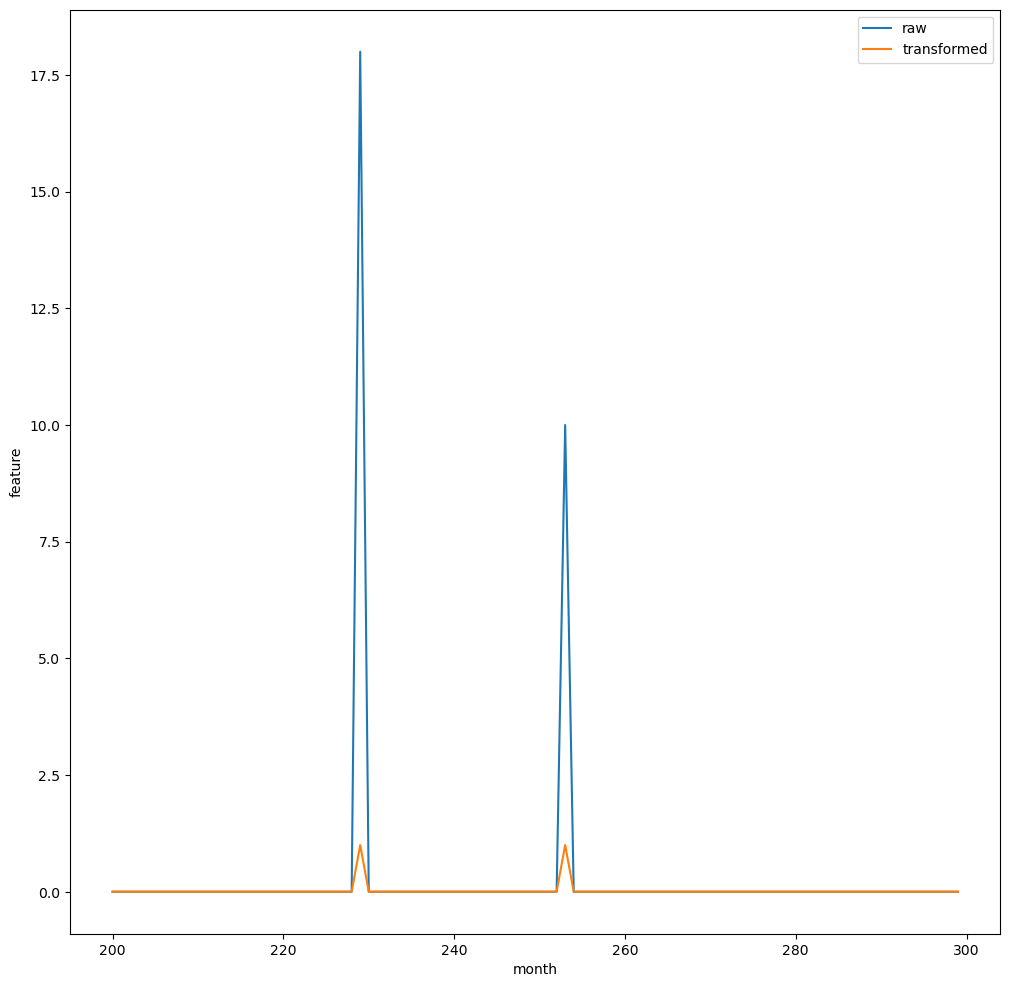

In [23]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_gte.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

Both peaks are hence replaced with a value of 1.

<a id='bool.lte'></a>

## bool.lte

Returns 1 if feature values are greater than or equal to the supplied parameter, zero otherwise.

[Menu](#Menu)

In [24]:
#! Display usage and documentation for a transform
!viewser transforms show any/bool.lte


  >> Function description

  Docstring:
  "1 if s >= value, else 0 "
   
  Bool.lte takes 1 argument(s):
  - value (<class 'float'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [25]:
value=10

In [26]:
queryset = (Queryset("jim_transform_test_lte", "country_month")
 
            # target variable
            .with_column(Column("lte_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.bool.lte(value)
                        )
            )   

In [27]:
data_lte = queryset.publish().fetch()
print(data_lte)

 .      o                        lte_ged_sb
month_id country_id            
1        1                    1
         2                    1
         3                    1
         4                    1
         5                    1
...                         ...
852      242                  1
         243                  1
         244                  1
         245                  1
         246                  1

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

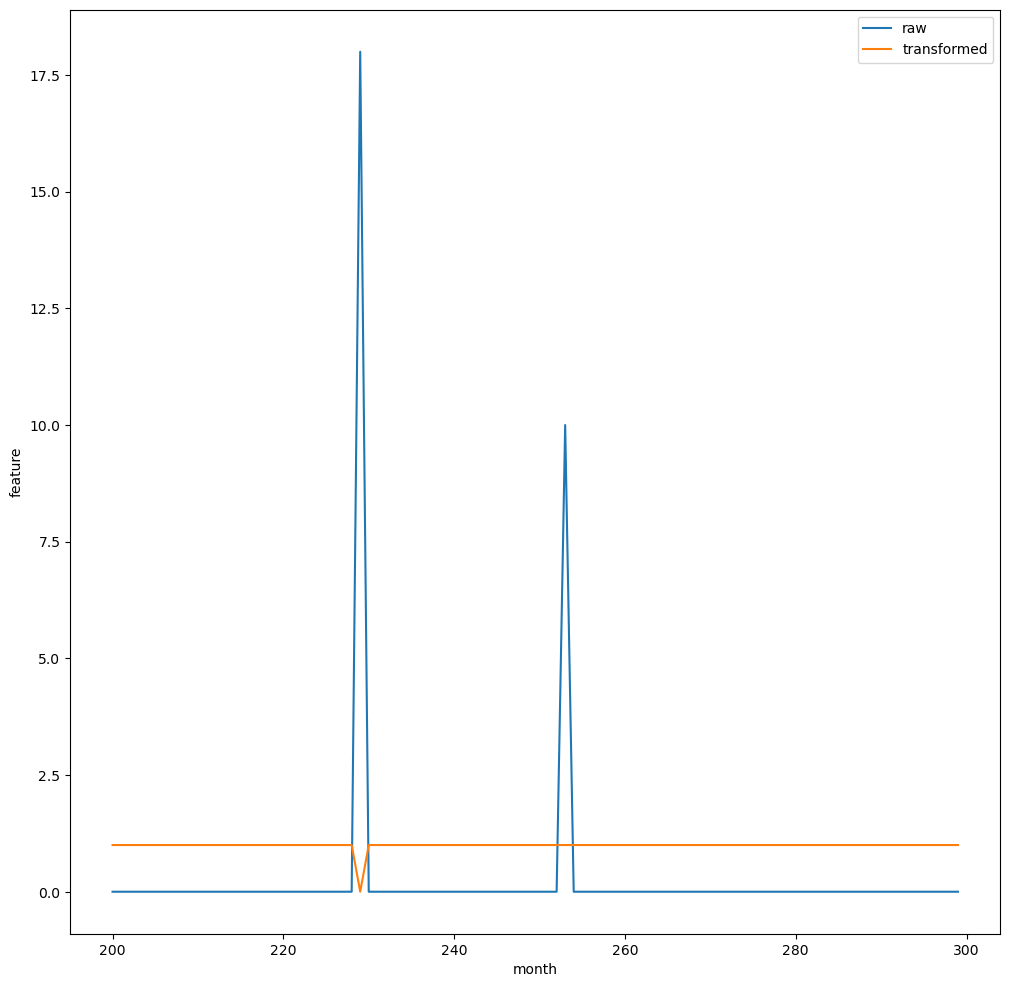

In [28]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_lte.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

With the chosen parameter, all values of the feature except at the first peak are replaced with 1, and the first peak is replaced with 0. 

<a id='bool.in_range'></a>
## bool.in_range

Returns 1 if feature values are in the supplied range, zero otherwise.

[Menu](#Menu)

In [29]:
#! Display usage and documentation for a transform
!viewser transforms show any/bool.in_range


  >> Function description

  Docstring:
  "1 if low <= s <= high else 0 "
   
  Bool.in_range takes 2 argument(s):
  - low (<class 'float'>)
  - high (<class 'float'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [30]:
low=5
high=15

In [31]:
queryset = (Queryset("jim_transform_test_range", "country_month")
 
            # target variable
            .with_column(Column("range_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.bool.in_range(low,high)
                        )
            )   

In [32]:
data_range = queryset.publish().fetch()
print(data_range)

 .      o                        range_ged_sb
month_id country_id              
1        1                      0
         2                      0
         3                      0
         4                      0
         5                      0
...                           ...
852      242                    0
         243                    0
         244                    0
         245                    0
         246                    0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

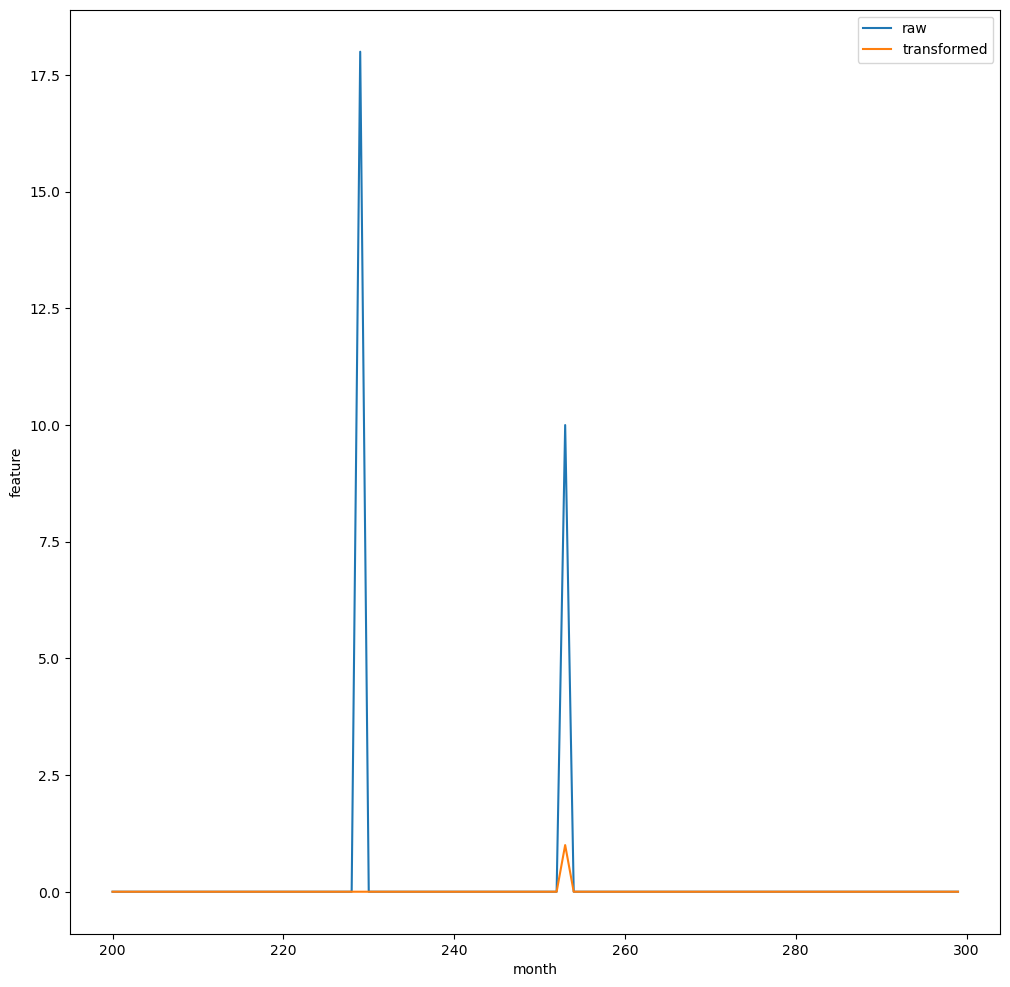

In [33]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_range.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

The chosen parameter values pick out the second peak, but rejects the first.

# Temporal transforms

This class of transforms treats the input dataframe as a set of independent time-series, one for each geographic unit, which are manipulated separately.

<a id='temporal.delta'></a>
## temporal.delta

This transform computes __changes__ in the feature that have occurred over a specified time, by computing (feature[now]-feature[now-time])

[Menu](#Menu)

In [34]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.delta


  >> Function description

  Docstring:
  "Return the time-delta of s "
   
  Temporal.delta takes 1 argument(s):
  - time (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [35]:
time=12

In [36]:
queryset = (Queryset("jim_transform_test_delta", "country_month")
 
            # target variable
            .with_column(Column("delta_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.delta(time)
                         .transform.missing.replace_na()
                        )
            )  

In [37]:
data_delta = queryset.publish().fetch()
print(data_delta)

 .      o                        delta_ged_sb
month_id country_id              
1        1                    0.0
         2                    0.0
         3                    0.0
         4                    0.0
         5                    0.0
...                           ...
852      242                  0.0
         243                  0.0
         244                  0.0
         245                  0.0
         246                  0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

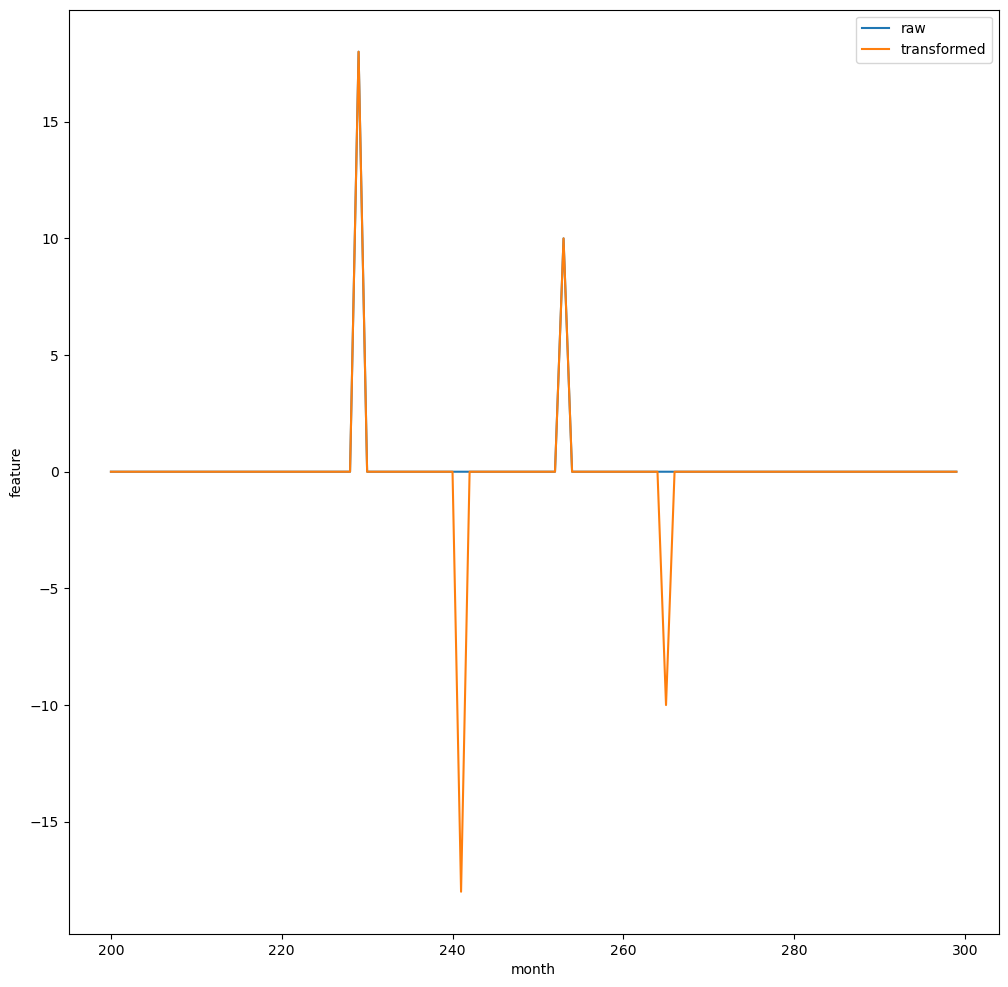

In [38]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_delta.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.tlag'></a>
## temporal.tlag

Returns the feature, lagged by the requested number of timesteps. This function effectively propagates information from the past into the present or future.

[Menu](#Menu)

In [39]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.tlag


  >> Function description

  Docstring:
  "Time lag "
   
  Temporal.tlag takes 1 argument(s):
  - time (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [40]:
time=12

In [41]:
queryset = (Queryset("jim_transform_test_tlag", "country_month")
 
            # target variable
            .with_column(Column("tlag_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.tlag(time)
                         .transform.missing.replace_na()
                        )
            )       

In [42]:
data_tlag = queryset.publish().fetch()
print(data_tlag)

 .      o                        tlag_ged_sb
month_id country_id             
1        1                   0.0
         2                   0.0
         3                   0.0
         4                   0.0
         5                   0.0
...                          ...
852      242                 0.0
         243                 0.0
         244                 0.0
         245                 0.0
         246                 0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

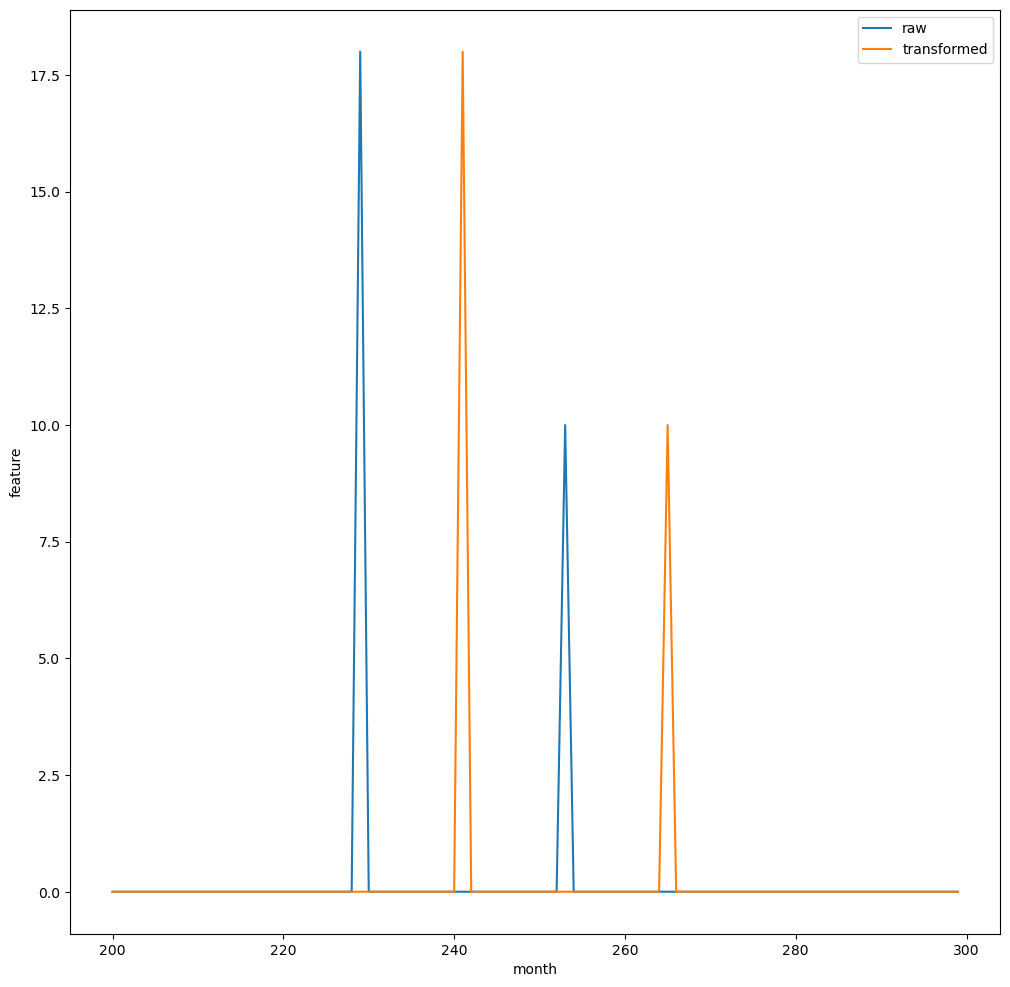

In [43]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_tlag.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

Both peaks in the raw feature are moved into the future by _value_ timesteps.

<a id='temporal.tlead'></a>
## temporal.tlead

Returns the feature, led by the requested number of timesteps. This transform propgates information from the present or future into the past __and should thus be used with caution!__

[Menu](#Menu)

In [44]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.tlead


  >> Function description

  Docstring:
  "Time lead "
   
  Temporal.tlead takes 1 argument(s):
  - time (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [45]:
time=12

In [46]:
queryset = (Queryset("jim_transform_test_tlead", "country_month")
 
            # target variable
            .with_column(Column("tlead_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.tlead(time)
                         .transform.missing.replace_na()
                        )
            )       

In [47]:
data_tlead = queryset.publish().fetch()
print(data_tlead)

 .      o                        tlead_ged_sb
month_id country_id              
1        1                    0.0
         2                    0.0
         3                    0.0
         4                    0.0
         5                    0.0
...                           ...
852      242                  0.0
         243                  0.0
         244                  0.0
         245                  0.0
         246                  0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

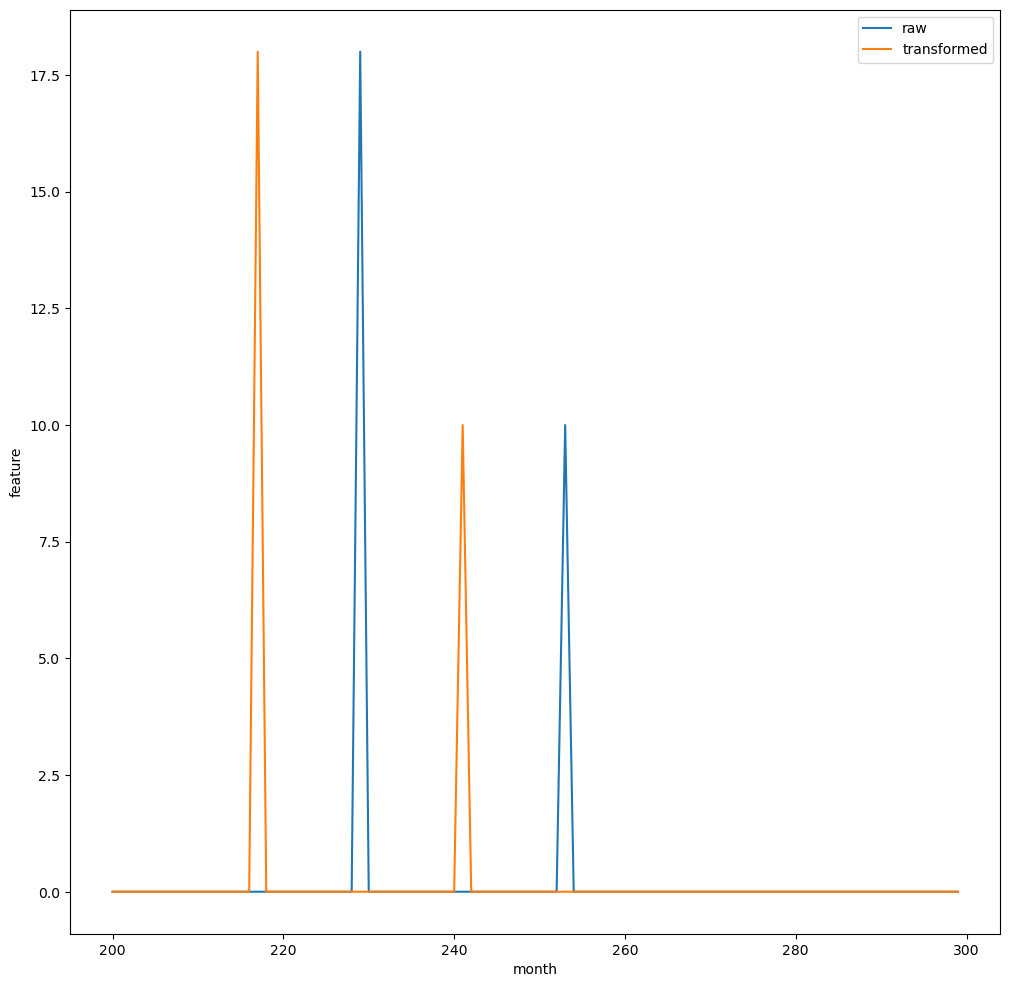

In [48]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_tlead.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

Both peaks in the raw feature are moved _value_ timesteps into the past.

<a id='temporal.moving_average'></a>
## temporal.moving_average

Returns the moving average of the feature over the requested time window.

Note that the time window extends back into the past, so that the average computed at any time t0 will never include events occurring at times t>t0.

[Menu](#Menu)

In [49]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.moving_average


  >> Function description

  Docstring:
  "Moving average "
   
  Temporal.moving_average takes 1 argument(s):
  - time (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [50]:
time=12

In [51]:
queryset = (Queryset("jim_transform_test_moving_av", "country_month")
 
            # target variable
            .with_column(Column("moving_av_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.moving_average(time)
                         .transform.missing.replace_na()
                        )
            )       

In [52]:
data_moving_av = queryset.publish().fetch()
print(data_moving_av)

 .      o                        moving_av_ged_sb
month_id country_id                  
1        1                        0.0
         2                        0.0
         3                        0.0
         4                        0.0
         5                        0.0
...                               ...
852      242                      0.0
         243                      0.0
         244                      0.0
         245                      0.0
         246                      0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

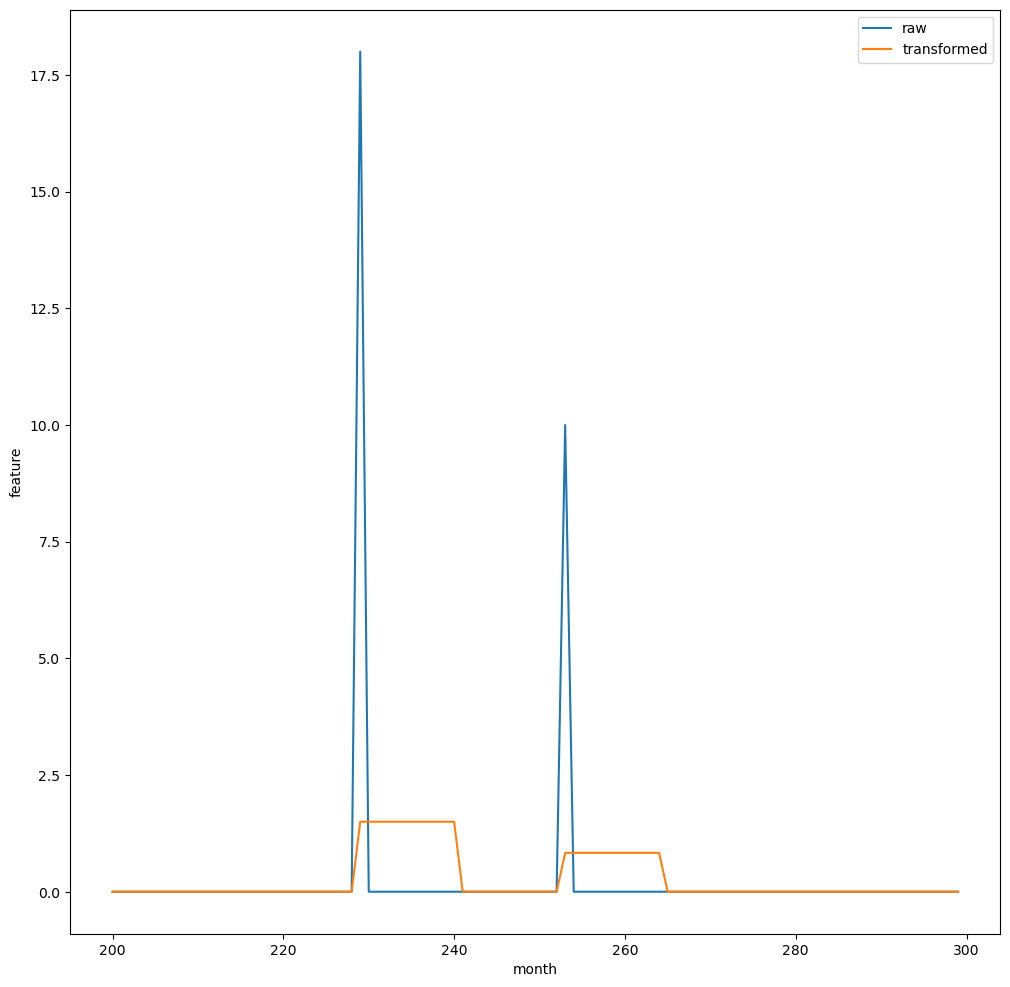

In [53]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_moving_av.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

With a window width of 12, the gap between the peaks is greater than the window width, so the peaks are smeared out into the future into two separate flat peaks.

If instead a window width of 36 is chosen, the peaks are smeared into a single flattened peak, whose value increases as the window first encounters _both_ peaks, and then declines as the first peak is left behind:

In [54]:
time=36

In [55]:
queryset = (Queryset("jim_transform_test_moving_av", "country_month")
 
            # target variable
            .with_column(Column("moving_av_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.moving_average(time)
                         .transform.missing.replace_na()
                        )
            )  

In [56]:
data_moving_av = queryset.publish().fetch()
print(data_moving_av)

 .      o                        moving_av_ged_sb
month_id country_id                  
1        1                        0.0
         2                        0.0
         3                        0.0
         4                        0.0
         5                        0.0
...                               ...
852      242                      0.0
         243                      0.0
         244                      0.0
         245                      0.0
         246                      0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

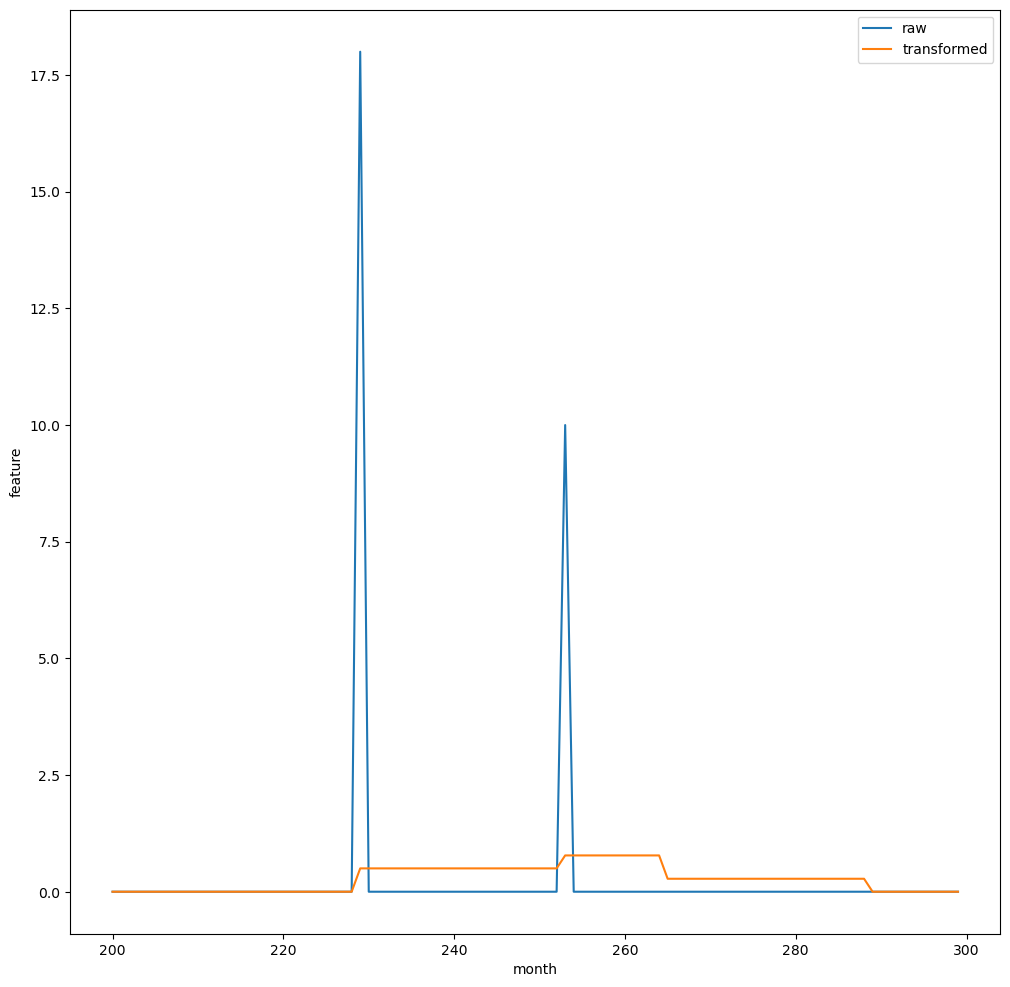

In [57]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_moving_av.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.moving_sum'></a>
## temporal.moving_sum

Returns the moving sum of the feature over the requested time window.

Note that the time window extends back into the past, so that the sum computed at any time t0 will never include events occurring at times t>t0.

[Menu](#Menu)

In [58]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.moving_sum


  >> Function description

  Docstring:
  "Moving sum "
   
  Temporal.moving_sum takes 1 argument(s):
  - time (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [59]:
time=12

In [60]:
queryset = (Queryset("jim_transform_test_moving_sum", "country_month")
 
            # target variable
            .with_column(Column("moving_sum_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.moving_sum(time)
                         .transform.missing.replace_na()
                        )
            )       

In [61]:
data_moving_sum = queryset.publish().fetch()
print(data_moving_sum)

 .      o                        moving_sum_ged_sb
month_id country_id                   
1        1                         0.0
         2                         0.0
         3                         0.0
         4                         0.0
         5                         0.0
...                                ...
852      242                       0.0
         243                       0.0
         244                       0.0
         245                       0.0
         246                       0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

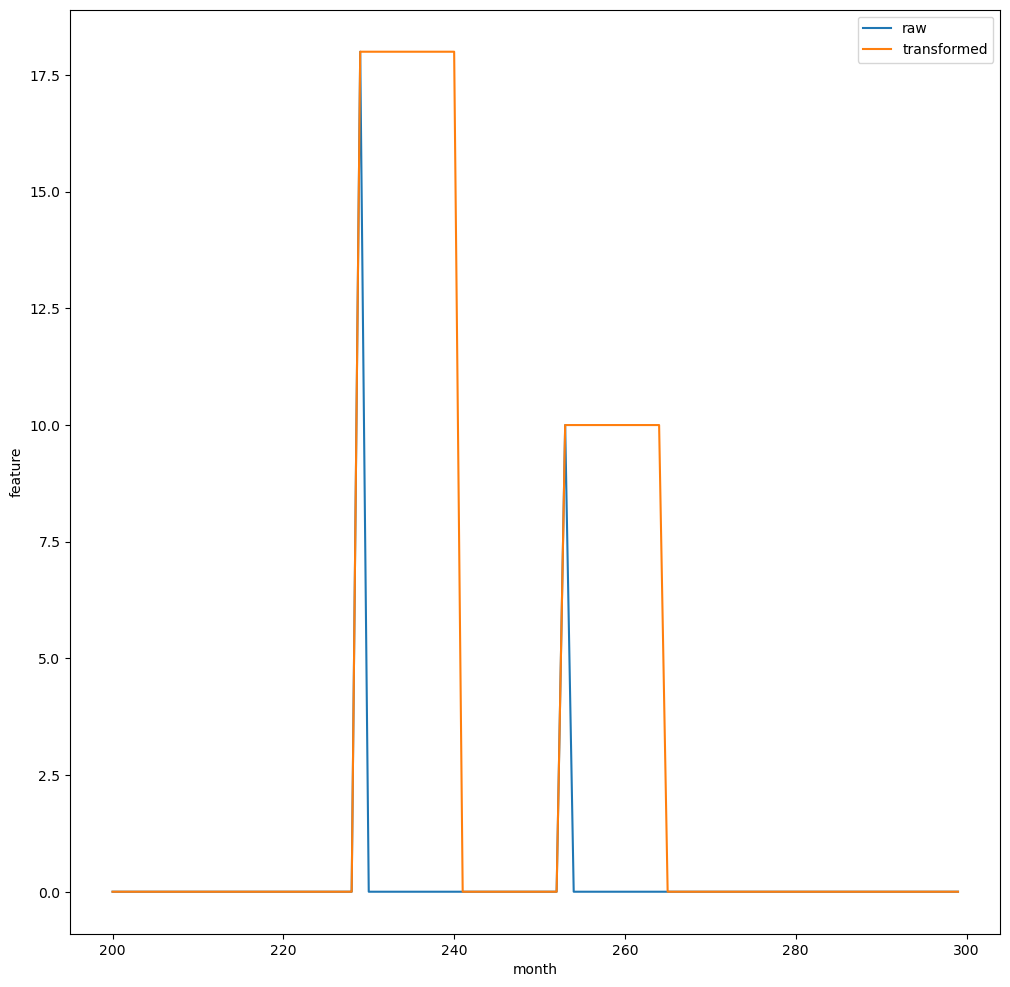

In [62]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_moving_sum.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

With a window width of 12, the resulting feature has two separated peaks which are the same height as the peaks in the raw feature, and have a width the same as the window width.

If the window width is increased to 36, the two peaks in the raw feature are smeared into a single peak whose value increases as the windo encounters both peaks for the first time, and drops again as the first peak is left beihind.

In [63]:
time=36

In [64]:
queryset = (Queryset("jim_transform_test_moving_sum", "country_month")
 
            # target variable
            .with_column(Column("moving_sum_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.moving_sum(time)
                         .transform.missing.replace_na()
                        )
            )  

In [65]:
data_moving_sum = queryset.publish().fetch()
print(data_moving_sum)

 .      o                        moving_sum_ged_sb
month_id country_id                   
1        1                         0.0
         2                         0.0
         3                         0.0
         4                         0.0
         5                         0.0
...                                ...
852      242                       0.0
         243                       0.0
         244                       0.0
         245                       0.0
         246                       0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

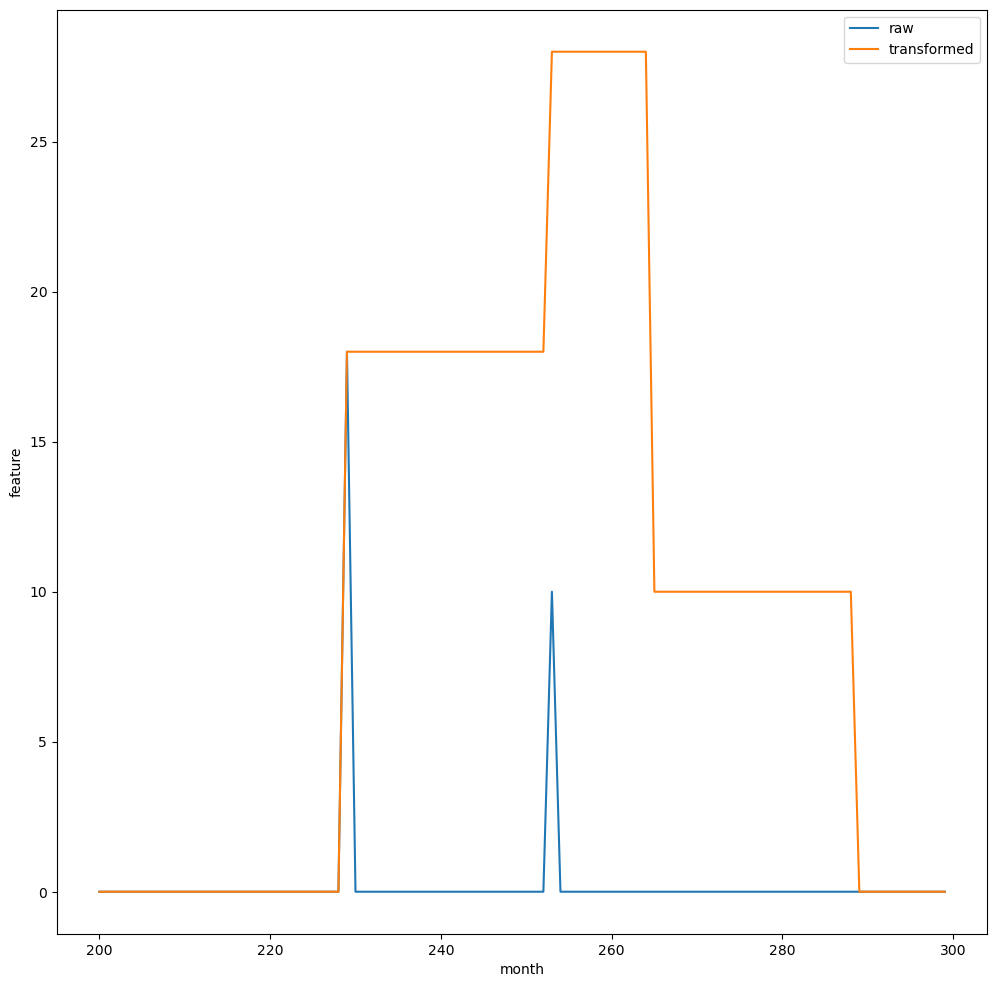

In [66]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_moving_sum.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.cweq'></a>
## temporal.cweq

Counts, moving forwards in time, while the feature is equal to the value, resetting to zero when the feature ceases to be equal to the value. Seed is the assumed value of the moving count at the first timestep. If not specified, seed is assumed to be the value of the first timestep in the input dataframe (1, in this case).

[Menu](#Menu)

In [67]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.cweq


  >> Function description

  Docstring:
  "Count while s equals value
  
  @TODO: Seed from series (series of seeds per groupvar?)"
   
  Temporal.cweq takes 2 argument(s):
  - value (<class 'float'>)
  - seed (<class 'inspect._empty'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------------



In [68]:
value=0
seed=0

In [69]:
queryset = (Queryset("jim_transform_test_cweq", "country_month")
 
            # target variable
            .with_column(Column("cweq_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.cweq(value,seed)
                         .transform.missing.replace_na()
                        )
            )       

In [70]:
data_cweq = queryset.publish().fetch()
print(data_cweq)

 .      o                        cweq_ged_sb
month_id country_id             
1        1                     1
         2                     1
         3                     1
         4                     1
         5                     1
...                          ...
852      242                 338
         243                 333
         244                 333
         245                 327
         246                 333

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

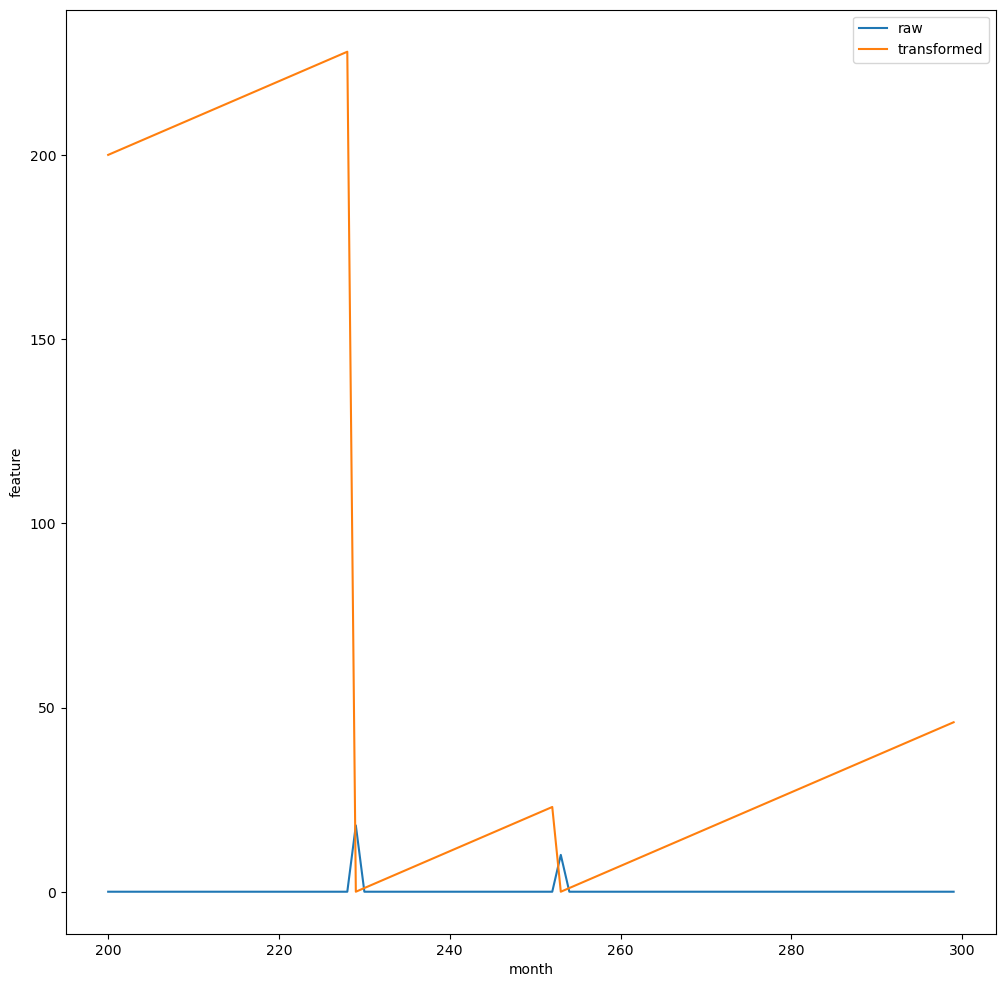

In [71]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_cweq.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

With a seed value of 0, and no peaks occurring before the timesteps shown in the plot, the initial value of the transformed feature is the first timestep in the plot window. The transformed feature counts up by 1 moving forward in time, until a value of the feature which does not equal _value_ is encountered, at which point the transformed feature resets to zero.

Setting the seed to a non-zero value simply changes the values of the transformed feature before the first peak is encountered.

In [72]:
value=0
seed=100

In [73]:
queryset = (Queryset("jim_transform_test_cweq", "country_month")
 
            # target variable
            .with_column(Column("cweq_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.cweq(value,seed)
                         .transform.missing.replace_na()
                        )
            )       

In [74]:
data_cweq = queryset.publish().fetch()
print(data_cweq)

 .      o                        cweq_ged_sb
month_id country_id             
1        1                   100
         2                   100
         3                   100
         4                   100
         5                   100
...                          ...
852      242                 338
         243                 333
         244                 333
         245                 327
         246                 333

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

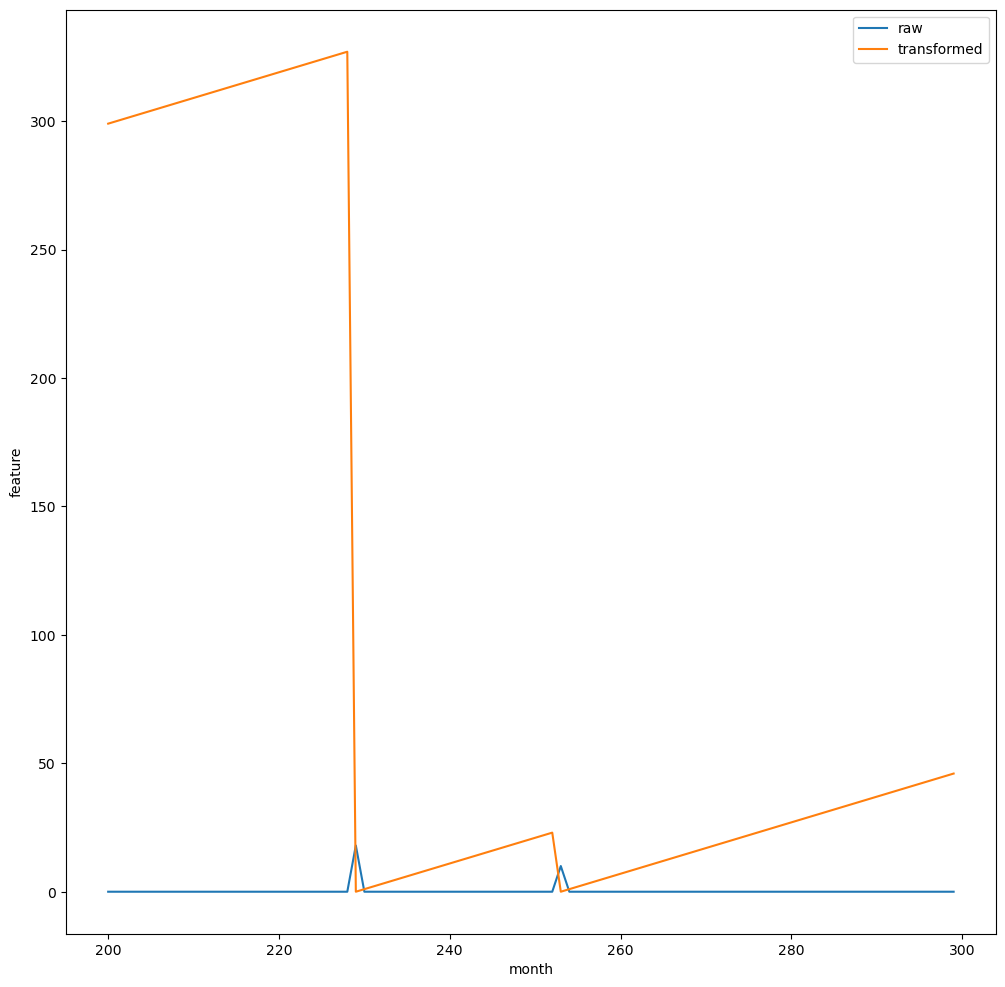

In [75]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_cweq.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

Setting _value_ to something other than 0 is unlikely to be what you want: 

In [76]:
value=10
seed=0

In [77]:
queryset = (Queryset("jim_transform_test_cweq", "country_month")
 
            # target variable
            .with_column(Column("cweq_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.cweq(value,seed)
                         .transform.missing.replace_na()
                        )
            ) 

In [78]:
data_cweq = queryset.publish().fetch()
print(data_cweq)

 .      o                        cweq_ged_sb
month_id country_id             
1        1                     0
         2                     0
         3                     0
         4                     0
         5                     0
...                          ...
852      242                   0
         243                   0
         244                   0
         245                   0
         246                   0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

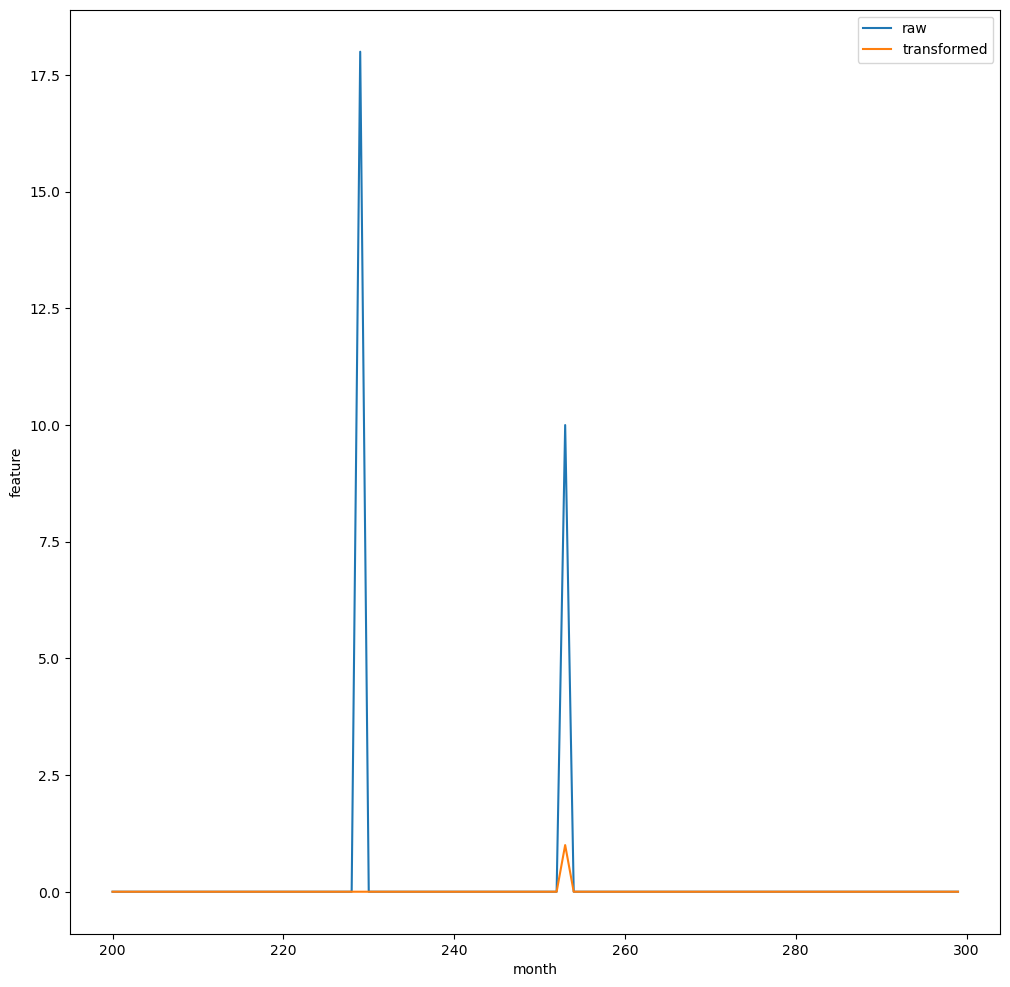

In [79]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_cweq.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.time_since'></a>
## temporal.time_since

This function returns the output of __temporal.cweq__ timelagged by 1 timestep.

If value=0, this function returns the time since the feature had a non-zero value. __Results from setting value to something other than zero are misleading and almost certainly not what you want.__
Seed is the assumed value of time_since at the first timestep.

[Menu](#Menu)

In [80]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.time_since


  >> Function description

  Docstring:
  "time since event in s where event is value other than 0.
  
  In order to compute a variable like "time since previous conflict
  event" we must apply a timelag to cweq() to get a series because
  for fitting a simultanous model we do not want the counter to be
  simultaneous to the event.
  
  Consider the data:
  
  event  : 0, 0, 1, 1, 0, 0 # Event
  cweq_0 : 1, 2, 0, 0, 1, 2 # count event while equals zero
  tisiev : ., 1, 2, 0, 0, 1 # time since event
  
  Fitting a model like "event ~ cweq0" makes no sense as cweq0 is
  always 0 if event=1.
  A model like "event ~ tsnp" makes more sense.
  We must apply a time lag to event before computing the counter to
  see how long time has elapsed since the previous event.
  
  Of course this isn't necessary for OSA modelling where all the
  rhs variables are time-lagged anyway but this is useful for
  dynamic simulation where X and predicted y are simulatenous."
   
  Temporal.time_since takes 2 a

In [81]:
value=0
seed=100

In [82]:
queryset = (Queryset("jim_transform_test_timesince", "country_month")
 
            # target variable
            .with_column(Column("timesince_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.time_since(value,seed)
                         .transform.missing.replace_na()
                        )
            )       

In [83]:
data_timesince = queryset.publish().fetch()
print(data_timesince)

 .      o                        timesince_ged_sb
month_id country_id                  
1        1                        0.0
         2                        0.0
         3                        0.0
         4                        0.0
         5                        0.0
...                               ...
852      242                    337.0
         243                    332.0
         244                    332.0
         245                    326.0
         246                    332.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

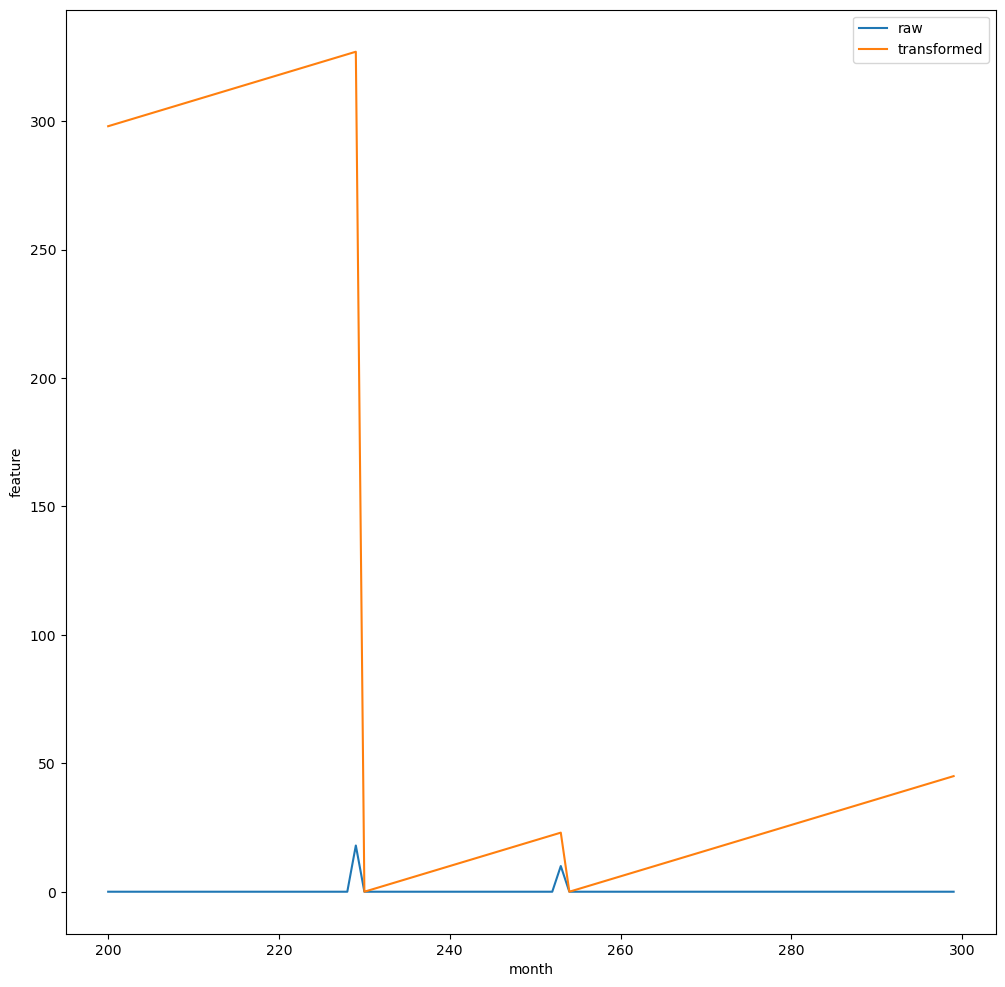

In [84]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_timesince.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.decay'></a>
## temporal.decay

When combined with __temporal.time_since__, computes an exponential time decay function whose value is 1 where the feature is non-zero, and decays exponentially into the future with the specified halflife. When a new non-zero value is encountered, the value of the decay function is set back to 1, and previous values are effectively forgotten.

This transform is designed for use with dummy features, since it takes account only of whether the raw feature is non-zero.

For decay functions that can be applied to real features, see __temporal.tree_lag__.

[Menu](#Menu)

In [85]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.decay


  >> Function description

  Docstring:
  "Decay function
  
  See half-life formulation at
  https://en.wikipedia.org/wiki/Exponential_decay"
   
  Temporal.decay takes 1 argument(s):
  - halflife (<class 'float'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [86]:
value=0
seed=0
halflife=12

In [87]:
queryset = (Queryset("jim_transform_test_decay", "country_month")
 
            # target variable
            .with_column(Column("decay_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.bool.gte(1)
                         .transform.temporal.time_since()
                         .transform.temporal.decay(halflife)
                         .transform.missing.replace_na()
                        )
            )       

In [88]:
data_decay = queryset.publish().fetch()
print(data_decay)

 .      o                        decay_ged_sb
month_id country_id              
1        1           0.000000e+00
         2           0.000000e+00
         3           0.000000e+00
         4           0.000000e+00
         5           0.000000e+00
...                           ...
852      242         3.516206e-09
         243         4.693572e-09
         244         4.693572e-09
         245         6.637713e-09
         246         4.693572e-09

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

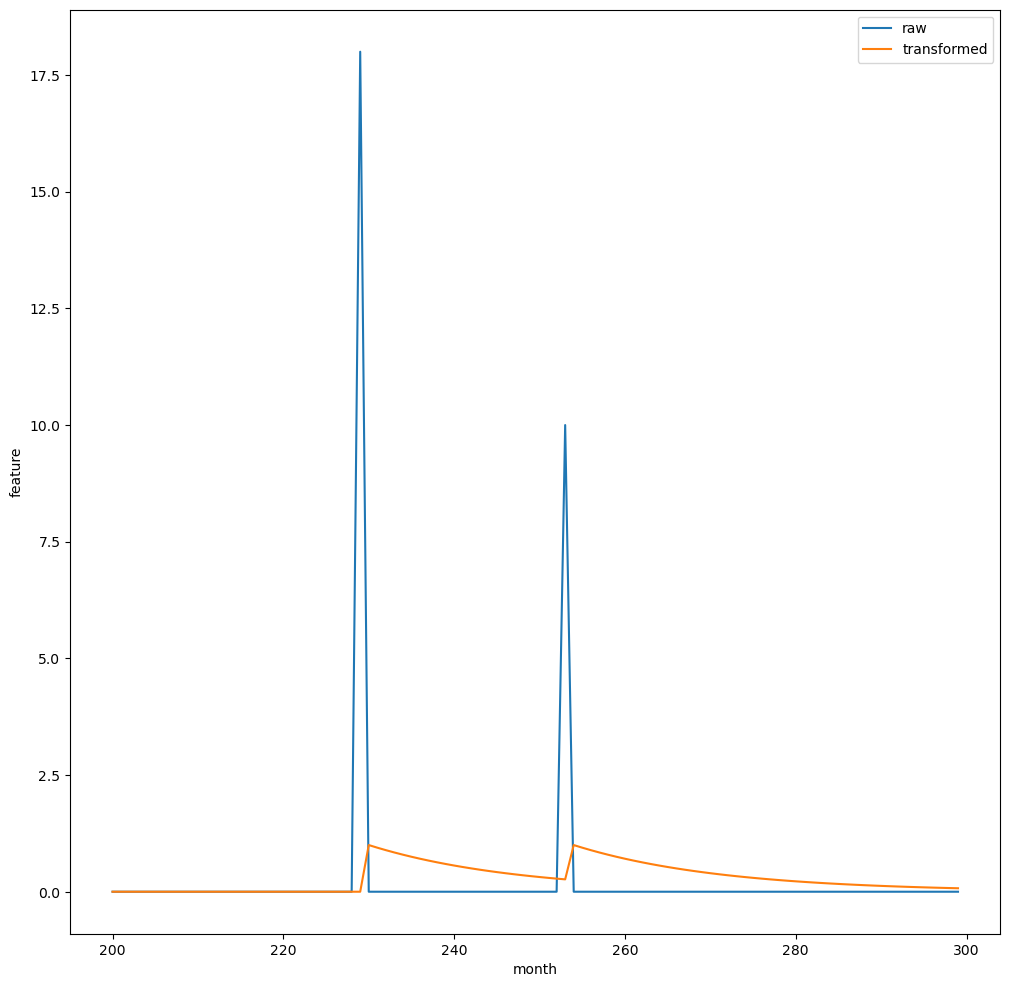

In [89]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_decay.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.onset_possible'></a>
## temporal.onset_possible

Determines whether an onset is possible usng the given window width, i.e. returns 0 for every _window_ timesteps following a non-zero value of the feature (when an onset with the given window is not possible), and 1 otherwise.

[Menu](#Menu)

In [90]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.onset_possible


  >> Function description

  Docstring:
  "Onset possible if no event occured in the preceeding window times "
   
  Temporal.onset_possible takes 1 argument(s):
  - window (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------------------------



In [91]:
window=12

In [92]:
queryset = (Queryset("jim_transform_test_onset_possible", "country_month")
 
            # target variable
            .with_column(Column("onset_possible_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.onset_possible(window)
                         .transform.missing.replace_na()
                        )
            )       

In [93]:
data_onset_possible = queryset.publish().fetch()
print(data_onset_possible)

 .      o                        onset_possible_ged_sb
month_id country_id                       
1        1                               1
         2                               1
         3                               1
         4                               1
         5                               1
...                                    ...
852      242                             1
         243                             1
         244                             1
         245                             1
         246                             1

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

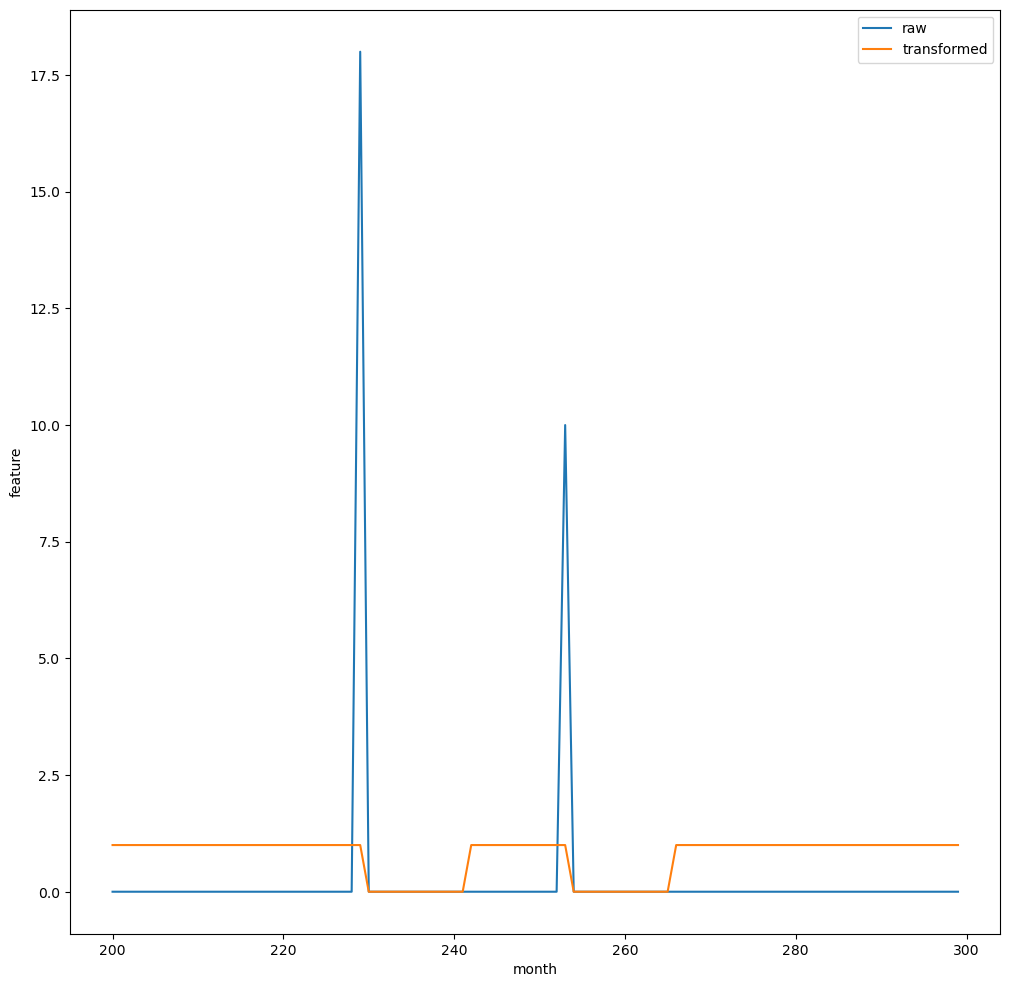

In [94]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_onset_possible.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.onset'></a>
## temporal.onset

Locates onset in a time series, using a the given window width. For every time when the feature is non-zero, returns 1 if there are no other non-zero values in the preceding window timesteps (an onset), and 0 otherwise.

[Menu](#Menu)

In [95]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.onset


  >> Function description

  Docstring:
  "Compute onset
  
  A row is defined as an onset if
  * onset is possible
  * s is greater than 0"
   
  Temporal.onset takes 1 argument(s):
  - window (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [96]:
window=12

In [97]:
queryset = (Queryset("jim_transform_test_onset", "country_month")
 
            # target variable
            .with_column(Column("onset_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.onset(window)
                         .transform.missing.replace_na()
                        )
            )       

In [98]:
data_onset = queryset.publish().fetch()
print(data_onset)

 .      o                        onset_ged_sb
month_id country_id              
1        1                      0
         2                      0
         3                      0
         4                      0
         5                      0
...                           ...
852      242                    0
         243                    0
         244                    0
         245                    0
         246                    0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

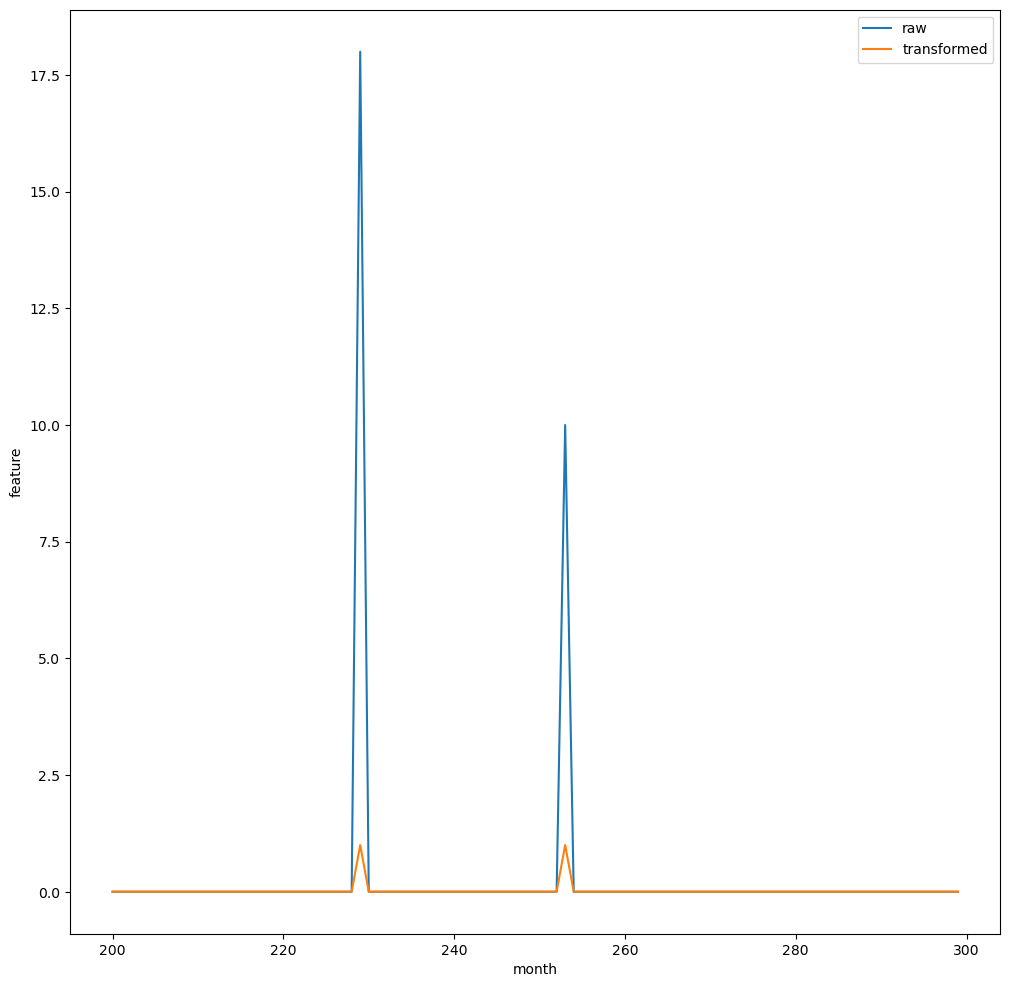

In [99]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_onset.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

In [100]:
window=6

In [101]:
queryset = (Queryset("jim_transform_test_onset", "country_month")
 
            # target variable
            .with_column(Column("onset_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.onset(window)
                         .transform.missing.replace_na()
                        )
            )  

In [102]:
data_onset = queryset.publish().fetch()
print(data_onset)

 .      o                        onset_ged_sb
month_id country_id              
1        1                      0
         2                      0
         3                      0
         4                      0
         5                      0
...                           ...
852      242                    0
         243                    0
         244                    0
         245                    0
         246                    0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

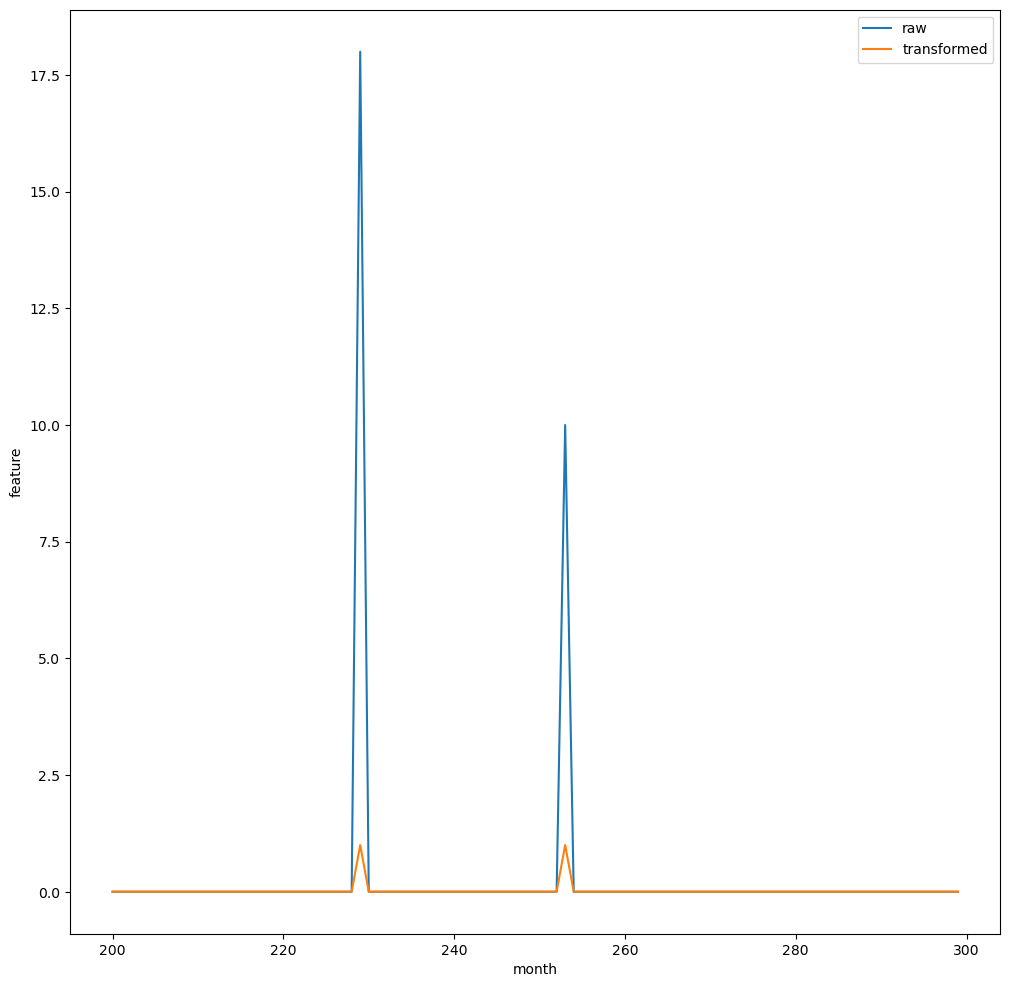

In [103]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_onset.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.entropy'></a>
## temporal.entropy



[Menu](#Menu)

In [104]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.entropy


  >> Function description

  Docstring:
  ""
  get_temporal_entropy created 04/03/2022 by Jim Dale
  
  Computed entropy along the time axis within a window of length specified by 'window'.
  
  The entropy of a feature x over a window of length w is
  
  sum_(i=1,w) (x_i/X)log_2(x_i/X) where X = sum_(i=1,w) (x_i)
  
  Arguments:
  
  df:                a dataframe for which entropy is to be computed
  
  window:            integer size of window
  
  offset:            datasets containing mostly zeros will return
                     NaNs or Infs for entropy most or all of the time.
                     Since this is unlikely to be desirable, an
                     offset can be added to all feature values. so
                     that sensible values for entropy are returned.
  
  Returns:
  
  A df containing the entropy computed for all times for all columns"
   
  Temporal.entropy takes 2 argument(s):
  - window (<class 'inspect._empty'>)
  - offset (<class 'inspect._empty'>)
  

In [105]:
window=12
offset=1.0

In [106]:
queryset = (Queryset("jim_transform_test_entropy", "priogrid_month")
 
            # target variable
            .with_column(Column("entropy_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.entropy(window,offset)
                         .transform.missing.replace_na()
                        )
            )       

In [107]:
data_entropy = queryset.publish().fetch()
print(data_entropy)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .                           entropy_ged_sb
month_id priogrid_gid                
1        62356              -0.000000
         79599              -0.000000
         79600              -0.000000
         79601              -0.000000
         80317              -0.000000
...                               ...
852      190496              3.584963
         190507              3.584963
         190508              3.584963
         190510              3.584963
         190511              3.584963

[11169720 rows x 1 columns]


Text(0, 0.5, 'feature')

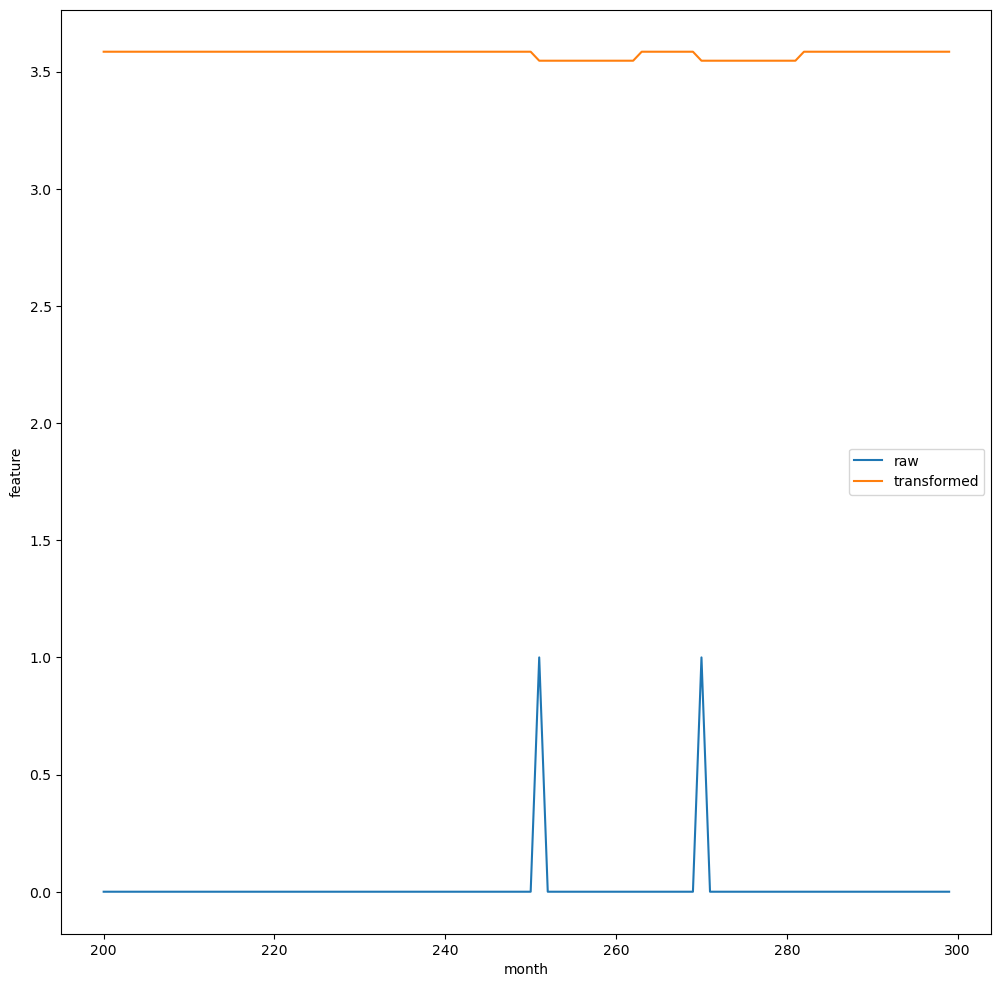

In [108]:
plt.plot(times,data_raw_pgm.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.plot(times,data_entropy.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='temporal.treelag'></a>
## temporal.treelag

This transform works in a similar fashion to the combination (temporal.time_since followed by termporal.decay), except:

(i) all the work is done by a single transform

(ii) there is a choice of decay function (uniform, 1/t, exponential, ramp and sigmoid)

(iii) whereas the (time_since + decay) transform 'forgets' each event when it comes to a new event, temporal.tree_lag adds the effects of events together, so that in principal it 'remembers' events arbitrary far back in the past 

(iv) temporal.treelag works on dummy as well as real variables

[Menu](#Menu)

In [109]:
#! Display usage and documentation for a transform
!viewser transforms show any/temporal.tree_lag


  >> Function description

  Docstring:
  "temporal_tree_lag
  
  Performs flexible time-lagging on df features which may be real or dummy,
  using a one-dimensional tree
  
  Arguments:
  
  df:                  dataframe containing feature to be lagged
  
  thetacrit:           parameter controlling how aggressively nodes in the past are
                       aggregated
  
  weight_function:    choice of weighting function. Allowed choices:
  
                      - 'uniform': weights for all nodes are unity. Unlikely to be
                        meaningful but provided for completeness
  
                      - 'oneovert': weights for nodes are 1/(tnow-tnode)
  
                      - 'expon': weights for nodes are exp(-(tnow-tnode)/sigma)
  
                      - 'ramp': weights for nodes are 1-(tnow-tnode)/sigma for
                        (tnow-tnode)<sigma, 0 otherwise
  
                      - 'sigmoid': weights are 1./(1+np.exp(-lag)) where
                        lag

In [110]:
thetacrit=0.1
weight_function='expon'
sigma=18
use_stride_tricks=True

In [111]:
queryset = (Queryset("jim_transform_test_temp_tree", "priogrid_month")
 
            # target variable
            .with_column(Column("temp_tree_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.tree_lag(thetacrit,weight_function,sigma,use_stride_tricks)
                        )
            )  

In [112]:
data_temp_tree = queryset.publish().fetch()
print(data_temp_tree)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o                       temp_tree_ged_sb
month_id priogrid_gid                  
1        62356                      0.0
         79599                      0.0
         79600                      0.0
         79601                      0.0
         80317                      0.0
...                                 ...
852      190496                     0.0
         190507                     0.0
         190508                     0.0
         190510                     0.0
         190511                     0.0

[11169720 rows x 1 columns]


Text(0, 0.5, 'feature')

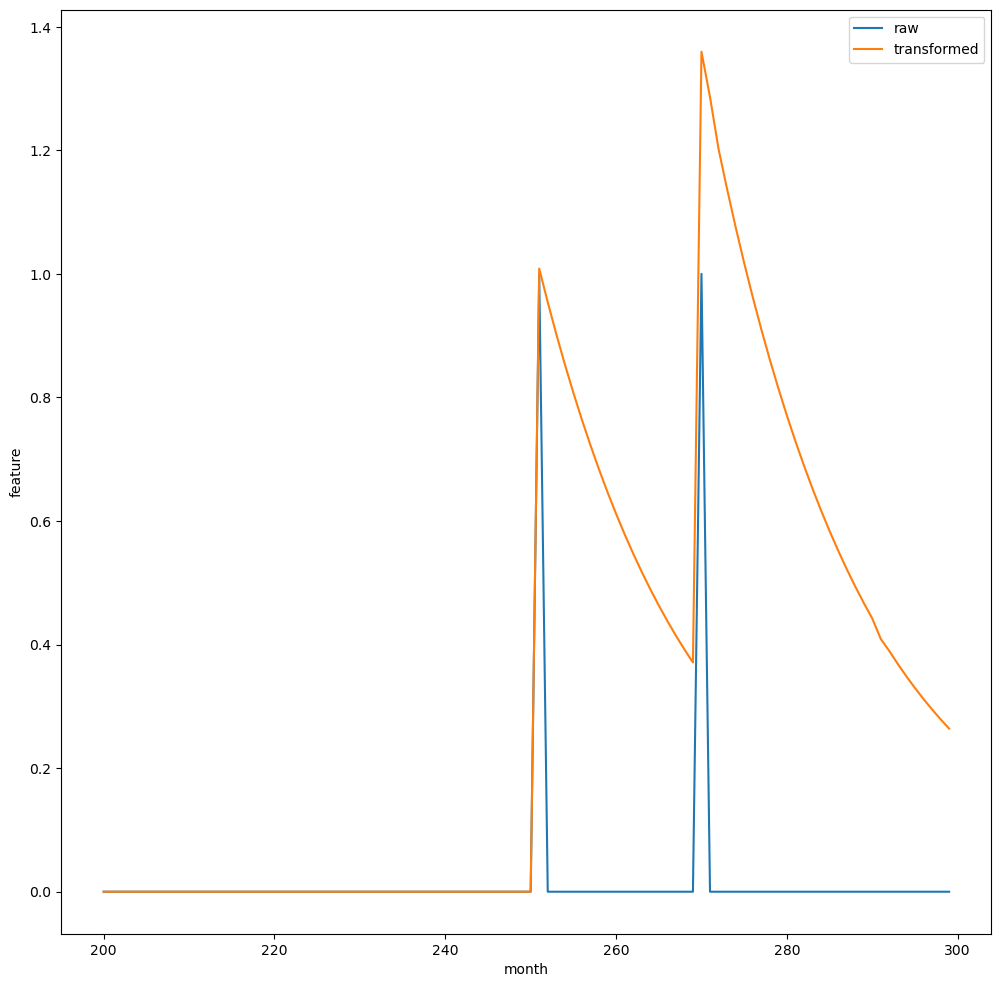

In [113]:
plt.plot(times,data_raw_pgm.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.plot(times,data_temp_tree.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

Note how the decayed tail of the first peak is added to the value of the second peak.

In [114]:
thetacrit=0.1
weight_function='uniform'
sigma=18
use_stride_tricks=True

In [115]:
queryset = (Queryset("jim_transform_test_temp_tree", "priogrid_month")
 
            # target variable
            .with_column(Column("temp_tree_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.tree_lag(thetacrit,weight_function,sigma,use_stride_tricks)
                        )
            ) 

In [116]:
data_temp_tree = queryset.publish().fetch()
print(data_temp_tree)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O                         temp_tree_ged_sb
month_id priogrid_gid                  
1        62356                      0.0
         79599                      0.0
         79600                      0.0
         79601                      0.0
         80317                      0.0
...                                 ...
852      190496                     0.0
         190507                     0.0
         190508                     0.0
         190510                     0.0
         190511                     0.0

[11169720 rows x 1 columns]


Text(0, 0.5, 'feature')

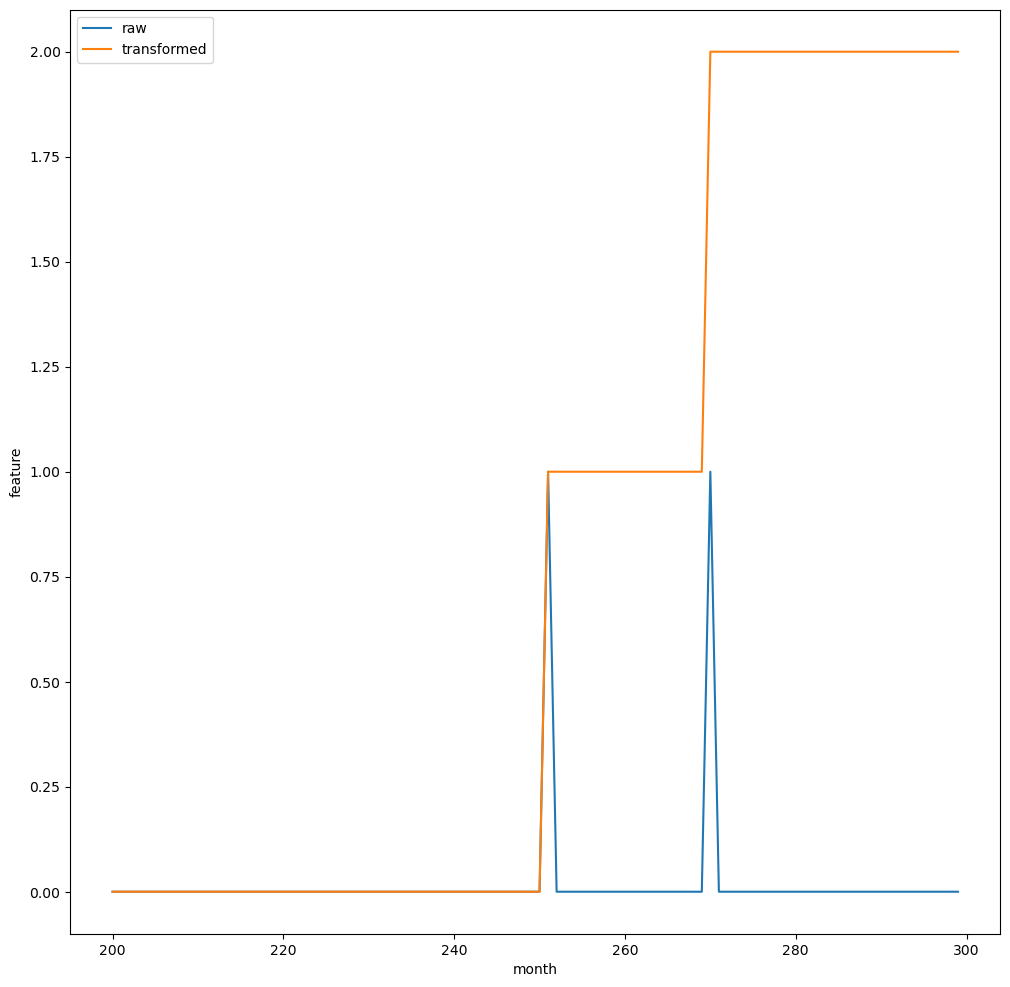

In [117]:
plt.plot(times,data_raw_pgm.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.plot(times,data_temp_tree.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

In [118]:
thetacrit=0.1
weight_function='oneovert'
sigma=18
use_stride_tricks=True

In [119]:
queryset = (Queryset("jim_transform_test_temp_tree", "priogrid_month")
 
            # target variable
            .with_column(Column("temp_tree_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.tree_lag(thetacrit,weight_function,sigma,use_stride_tricks)
                        )
            ) 

In [120]:
data_temp_tree = queryset.publish().fetch()
print(data_temp_tree)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o                             temp_tree_ged_sb
month_id priogrid_gid                  
1        62356                      0.0
         79599                      0.0
         79600                      0.0
         79601                      0.0
         80317                      0.0
...                                 ...
852      190496                     0.0
         190507                     0.0
         190508                     0.0
         190510                     0.0
         190511                     0.0

[11169720 rows x 1 columns]


Text(0, 0.5, 'feature')

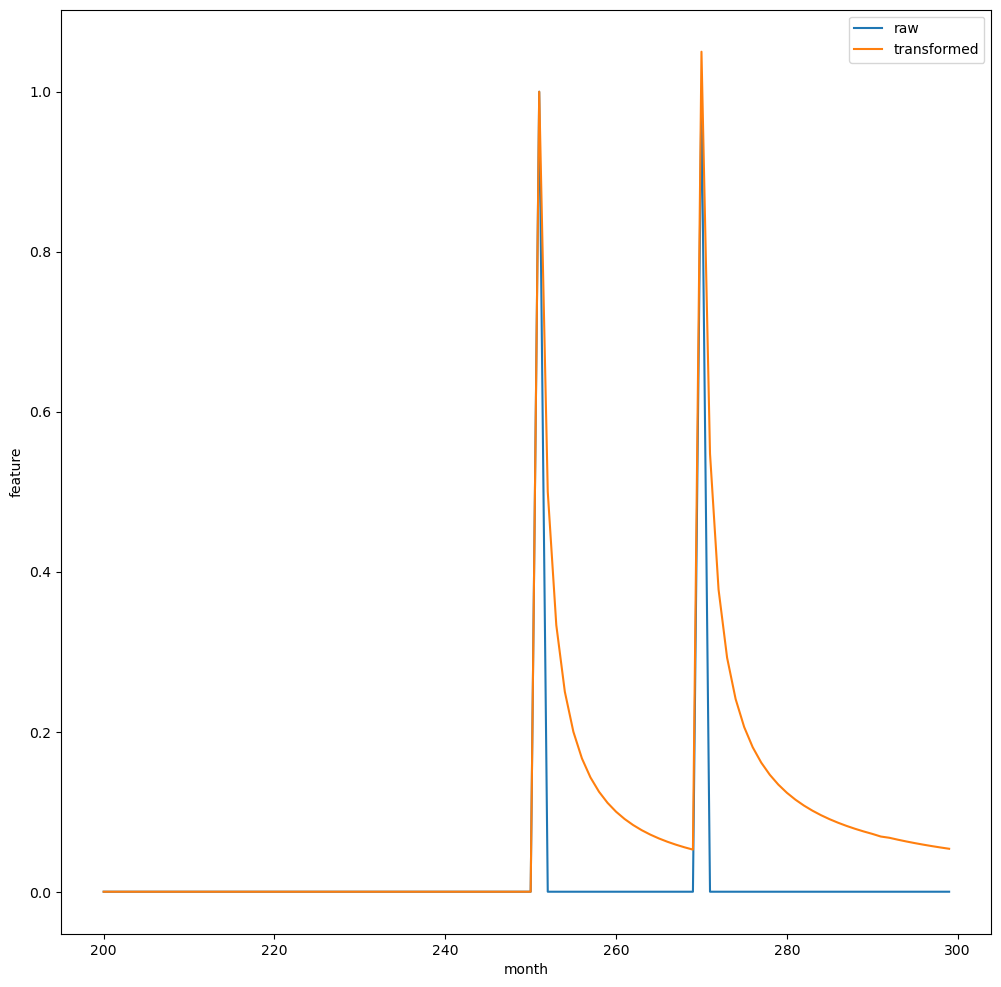

In [121]:
plt.plot(times,data_raw_pgm.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.plot(times,data_temp_tree.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

In [122]:
thetacrit=0.1
weight_function='ramp'
sigma=18
use_stride_tricks=True

In [123]:
queryset = (Queryset("jim_transform_test_temp_tree", "priogrid_month")
 
            # target variable
            .with_column(Column("temp_tree_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.tree_lag(thetacrit,weight_function,sigma,use_stride_tricks)
                        )
            ) 

In [124]:
data_temp_tree = queryset.publish().fetch()
print(data_temp_tree)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O                         temp_tree_ged_sb
month_id priogrid_gid                  
1        62356                      0.0
         79599                      0.0
         79600                      0.0
         79601                      0.0
         80317                      0.0
...                                 ...
852      190496                     0.0
         190507                     0.0
         190508                     0.0
         190510                     0.0
         190511                     0.0

[11169720 rows x 1 columns]


Text(0, 0.5, 'feature')

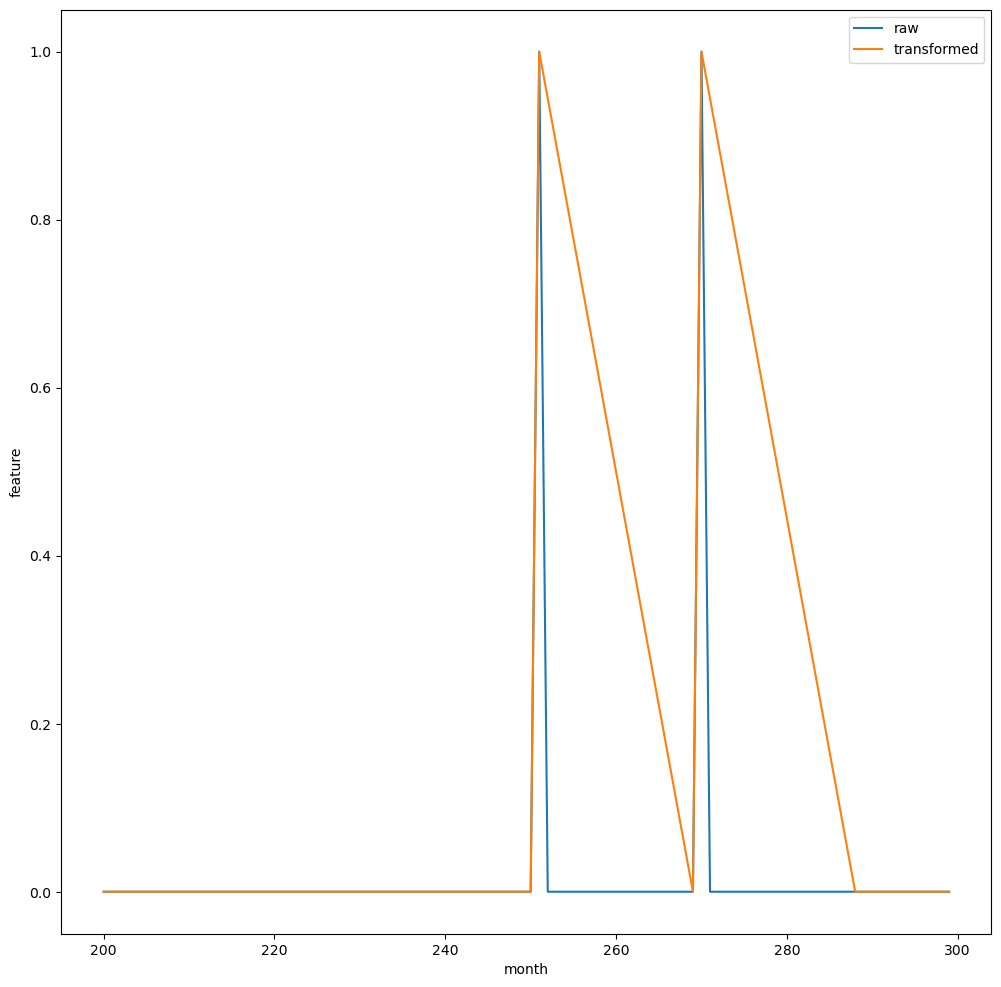

In [125]:
plt.plot(times,data_raw_pgm.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.plot(times,data_temp_tree.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

In [130]:
thetacrit=0.1
weight_function='sigmoid'
sigma=18
use_stride_tricks=True

In [131]:
queryset = (Queryset("jim_transform_test_temp_tree", "priogrid_month")
 
            # target variable
            .with_column(Column("temp_tree_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.temporal.tree_lag(thetacrit,weight_function,sigma,use_stride_tricks)
                        )
            ) 

In [132]:
data_temp_tree = queryset.publish().fetch()
print(data_temp_tree)

 .                           temp_tree_ged_sb
month_id priogrid_gid                  
1        62356                      0.0
         79599                      0.0
         79600                      0.0
         79601                      0.0
         80317                      0.0
...                                 ...
852      190496                     0.0
         190507                     0.0
         190508                     0.0
         190510                     0.0
         190511                     0.0

[11169720 rows x 1 columns]


Text(0, 0.5, 'feature')

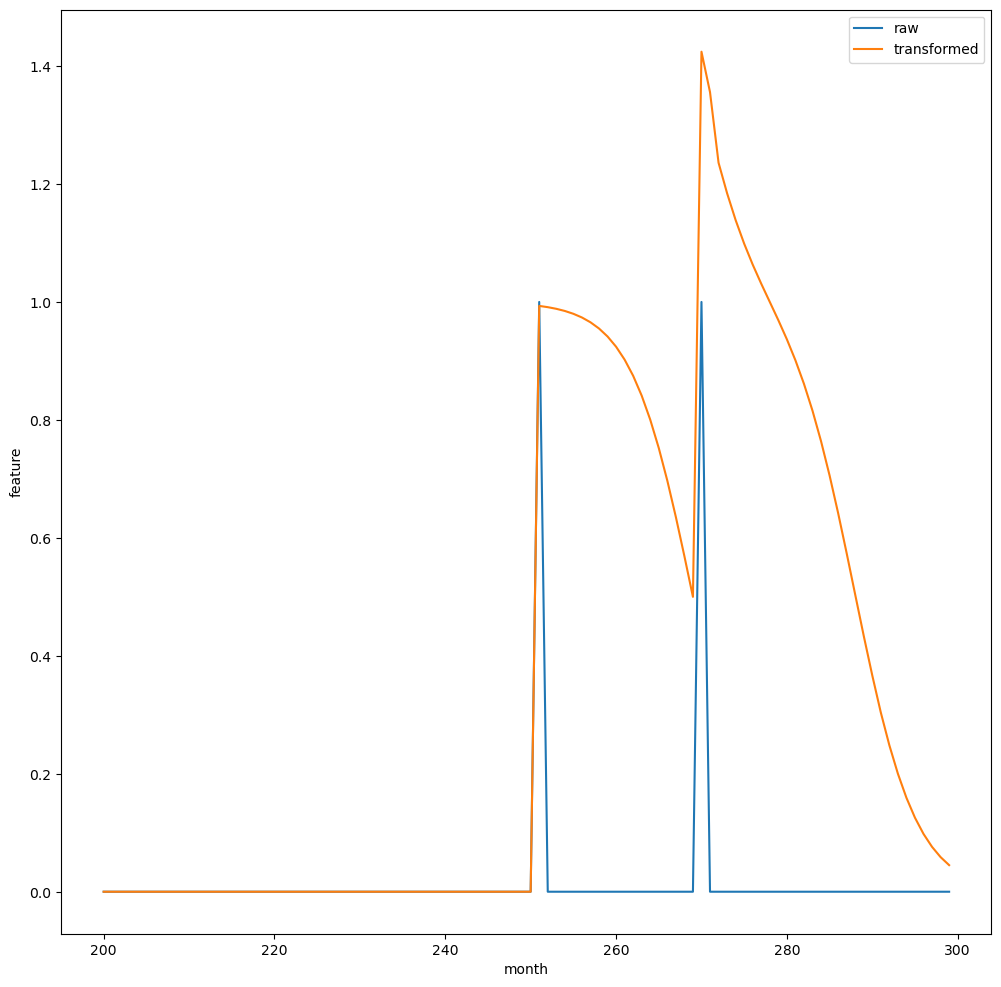

In [133]:
plt.plot(times,data_raw_pgm.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.plot(times,data_temp_tree.loc[(slice(t0,t1-1), pgid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='unit.mean'></a>
## unit.mean

Returns a series where all values are equal to the mean of the __non-zero__ values of the feature (taken over __all__ timesteps in the feature).

[Menu](#Menu)

In [134]:
#! Display usage and documentation for a transform
!viewser transforms show any/unit.mean


  >> Function description

  Docstring:
  "Per-groupvar arithmetic mean "
   
  Unit.mean takes no arguments
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------
  >> Description

  Something
  
   
  anonymous@2021-06-30
   
  ----------------------------------------------------



In [135]:
queryset = (Queryset("jim_transform_test_mean", "country_month")
 
            # target variable
            .with_column(Column("mean_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.unit.mean()
                         .transform.missing.replace_na()
                        )
            )  

In [136]:
data_mean = queryset.publish().fetch()
print(data_mean)

 .      o                        mean_ged_sb
month_id country_id             
1        1              0.000000
         2              0.000000
         3              0.045775
         4              0.191315
         5              0.000000
...                          ...
852      242            0.062215
         243            0.287559
         244            0.036385
         245           17.983122
         246           12.126582

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

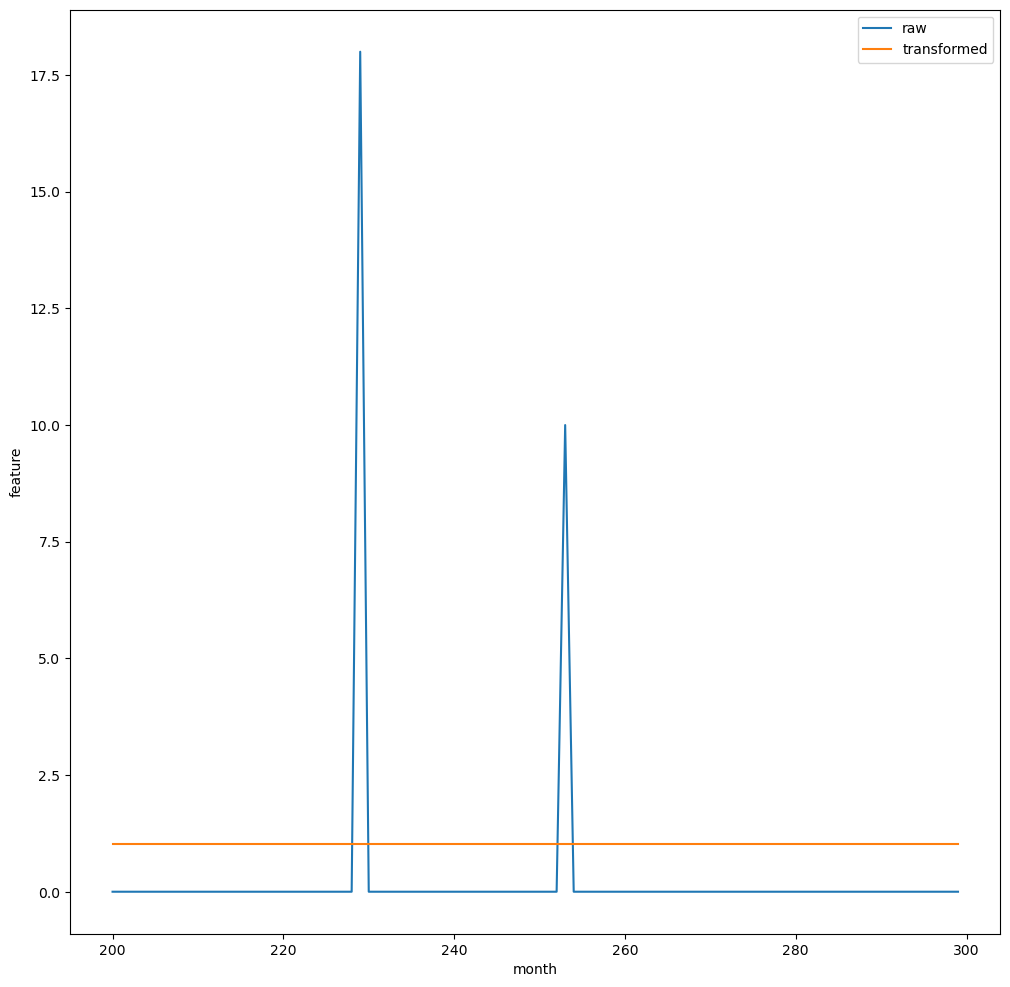

In [137]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_mean.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='unit.demean'></a>
## unit.demean

Returns a series where all values are equal to the feature minus the mean of the __non-zero__ values of the feature (taken over __all__ timesteps in the feature).

[Menu](#Menu)

In [138]:
#! Display usage and documentation for a transform
!viewser transforms show any/unit.demean


  >> Function description

  Docstring:
  "demean, s = s - mean_group(s) "
   
  Unit.demean takes no arguments
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------
  >> Description

  Something else!
  
   
  anonymous@2021-06-30
   
  ----------------------------------------------------



In [139]:
queryset = (Queryset("jim_transform_test_demean", "country_month")
 
            # target variable
            .with_column(Column("demean_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.unit.demean()
                         .transform.missing.replace_na()
                        )
            )  

In [140]:
data_demean = queryset.publish().fetch()
print(data_demean)

 .      o                        demean_ged_sb
month_id country_id               
1        1                0.000000
         2                0.000000
         3               -0.045775
         4               -0.191315
         5                0.000000
...                            ...
852      242             -0.062215
         243             -0.287559
         244             -0.036385
         245            -17.983122
         246            -12.126582

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

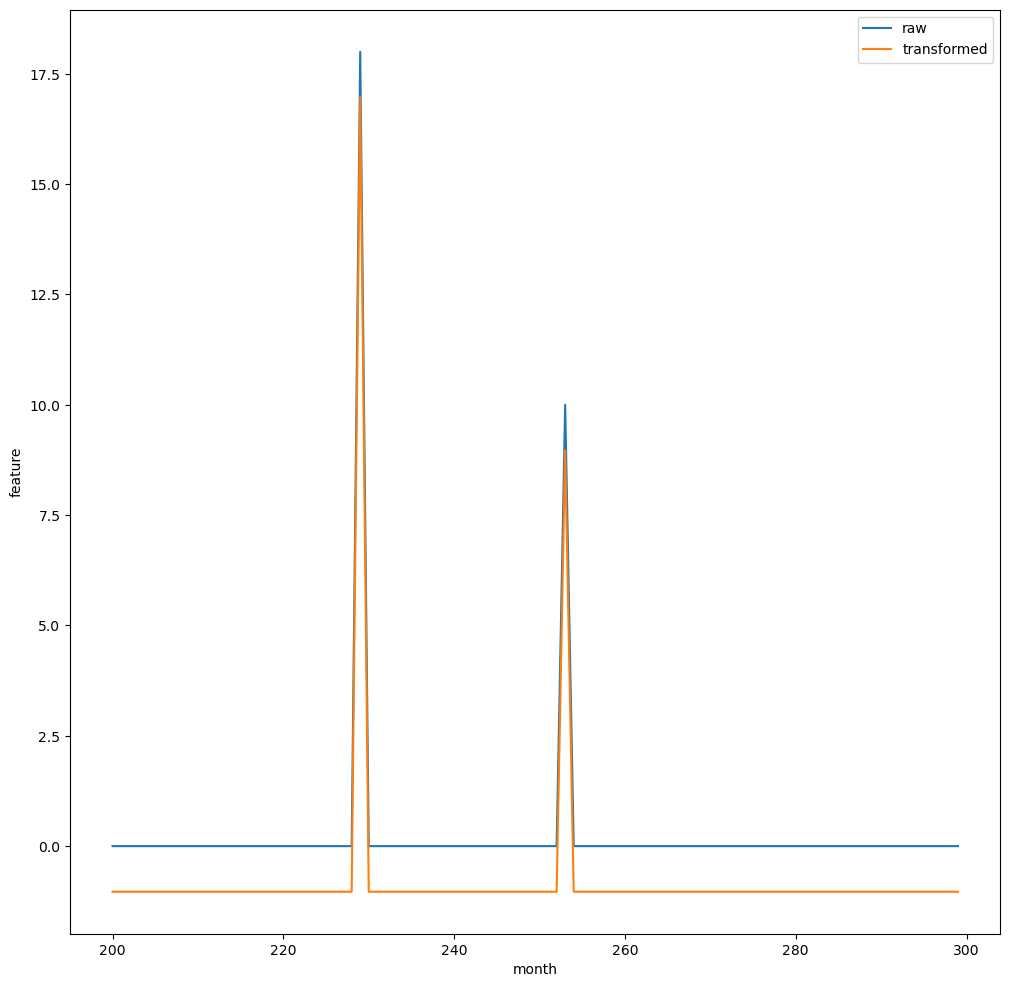

In [141]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_demean.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='unit.rollmax'></a>
## unit.rollmax

Returns the rolling maximum value of the feature with a window of the specified length.

Note that the time window extends back into the past, so that the rolling maximum computed at any time t0 will never include events occurring at times t>t0.

[Menu](#Menu)

In [142]:
#! Display usage and documentation for a transform
!viewser transforms show any/unit.rollmax


  >> Function description

  Docstring:
  "Rolling max "
   
  Unit.rollmax takes 1 argument(s):
  - window (<class 'int'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [143]:
window=50

In [144]:
queryset = (Queryset("jim_transform_test_rollmax", "country_month")
 
            # target variable
            .with_column(Column("rollmax_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.unit.rollmax(window)
                         .transform.missing.replace_na()
                        )
            )  

In [145]:
data_rollmax = queryset.publish().fetch()
print(data_rollmax)

 .      o                        rollmax_ged_sb
month_id country_id                
1        1                      0.0
         2                      0.0
         3                      0.0
         4                      0.0
         5                      0.0
...                             ...
852      242                    0.0
         243                    0.0
         244                    0.0
         245                    0.0
         246                    0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

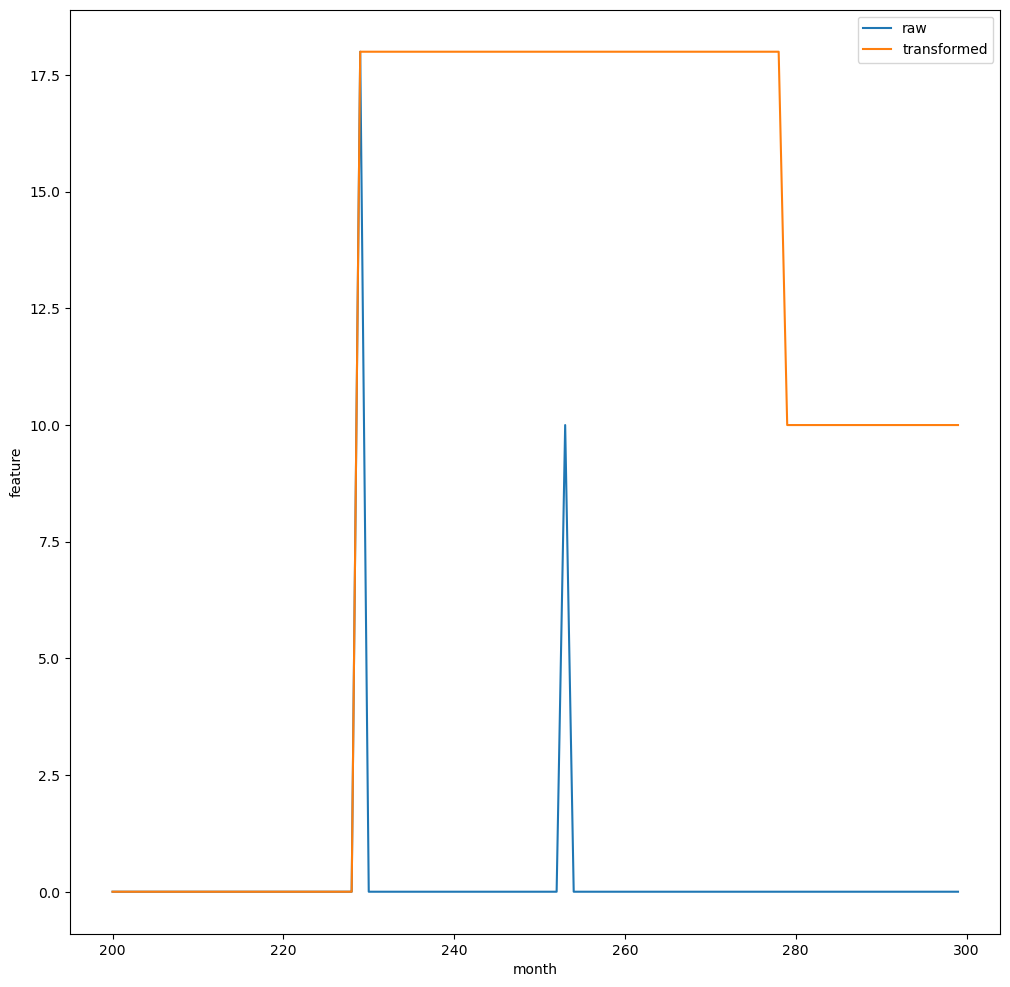

In [147]:
plt.plot(times,data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.plot(times,data_rollmax.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times)))
plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

# Missing transforms

This class of transforms fill in missing data.

<a id='missing.replace_na'></a>
## missing.replace_na

This is a very basic transform transform whcih simply replaces NaNs in the dataframe with a specified number, zero by default.

[Menu](#Menu)

In [148]:
#! Display usage and documentation for a transform
!viewser transforms show any/missing.replace_na


  >> Function description

  Docstring:
  "..."
   
  Missing.replace_na takes 1 argument(s):
  - replacement (<class 'inspect._empty'>)
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [149]:
queryset = (Queryset("jim_transform_test_replace_na", "country_month")
 
            # target variable
            .with_column(Column("replace_na_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                        )
            )  

In [150]:
data_replace_na = queryset.publish().fetch()
print(data_replace_na)

 .      o                        replace_na_ged_sb
month_id country_id                   
1        1                         0.0
         2                         0.0
         3                         0.0
         4                         0.0
         5                         0.0
...                                ...
852      242                       0.0
         243                       0.0
         244                       0.0
         245                       0.0
         246                       0.0

[158230 rows x 1 columns]


We won't see any differences in the plot, so we omit it.

<a id='missing.fill'></a>
## missing.fill

This is a bit more complex and unpredictable than missing.replace_na, as it does a forward fill, and then a backward fill. To see the effects, we will examine the whole time-range.

[Menu](#Menu)

In [151]:
#! Display usage and documentation for a transform
!viewser transforms show any/missing.fill


  >> Function description

  Docstring:
  "Fill column in dataframe with optional direction and area.
  
  Args:
      s: Pandas series to apply filling to.
      limit_direction: Direction in which to fill.
      limit_area: Area to fill. Default None refers to the entire series."
   
  Missing.fill takes 2 argument(s):
  - limit_direction (typing.Literal['forward', 'backward', 'both'])
  - limit_area (typing.Union[typing.Literal['inside', 'outside'], NoneType])
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------------------------------



In [152]:
queryset = (Queryset("jim_transform_test_fill", "country_month")
 
            # target variable
            .with_column(Column("fill_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.fill()
                        )
            )  

In [153]:
data_fill = queryset.publish().fetch()
print(data_fill)

 .      o                        fill_ged_sb
month_id country_id             
1        1                   0.0
         2                   0.0
         3                   0.0
         4                   0.0
         5                   0.0
...                          ...
852      242                 0.0
         243                 0.0
         244                 0.0
         245               510.0
         246                 0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

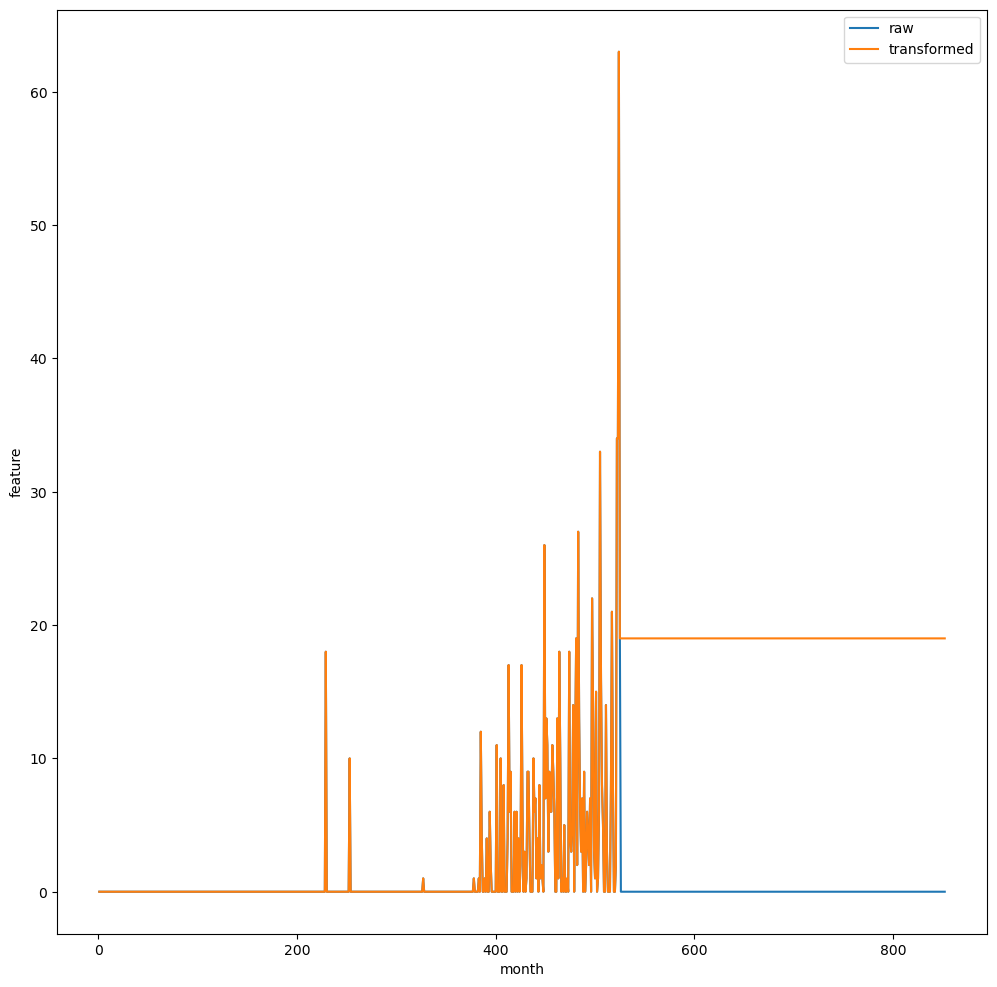

In [154]:
indx=data_raw_cm.index

tmin=indx.min(axis=0)
tmax=indx.max(axis=0)
tmin=tmin[0]
tmax=tmax[0]+1

times_full=range(tmin,tmax)

plt.plot(times_full,data_raw_cm.loc[(slice(None), countryid), :].values.reshape(len(times_full)))
plt.plot(times_full,data_fill.loc[(slice(None), countryid), :].values.reshape(len(times_full)))

plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

<a id='missing.extrapolate'></a>
## missing.extrapolate

This transform does linear extrapolation.

[Menu](#Menu)

In [155]:
#! Display usage and documentation for a transform
!viewser transforms show any/missing.extrapolate


  >> Function description

  Docstring:
  "Interpolate and extrapolate "
   
  Missing.extrapolate takes 2 argument(s):
  - limit_direction (<class 'str'>)
  - limit_area (typing.Union[str, NoneType])
   
  This transform can be applied to any kind of data.
  ----------------------------------------------------



In [156]:
queryset = (Queryset("jim_transform_test_extrapolate", "country_month")
 
            # target variable
            .with_column(Column("extrapolate_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.extrapolate()
                        )
            ) 

In [157]:
data_extrapolate = queryset.publish().fetch()
print(data_extrapolate)

 .      o                        extrapolate_ged_sb
month_id country_id                    
1        1                          0.0
         2                          0.0
         3                          0.0
         4                          0.0
         5                          0.0
...                                 ...
852      242                        0.0
         243                        0.0
         244                        0.0
         245                      510.0
         246                        0.0

[158230 rows x 1 columns]


Text(0, 0.5, 'feature')

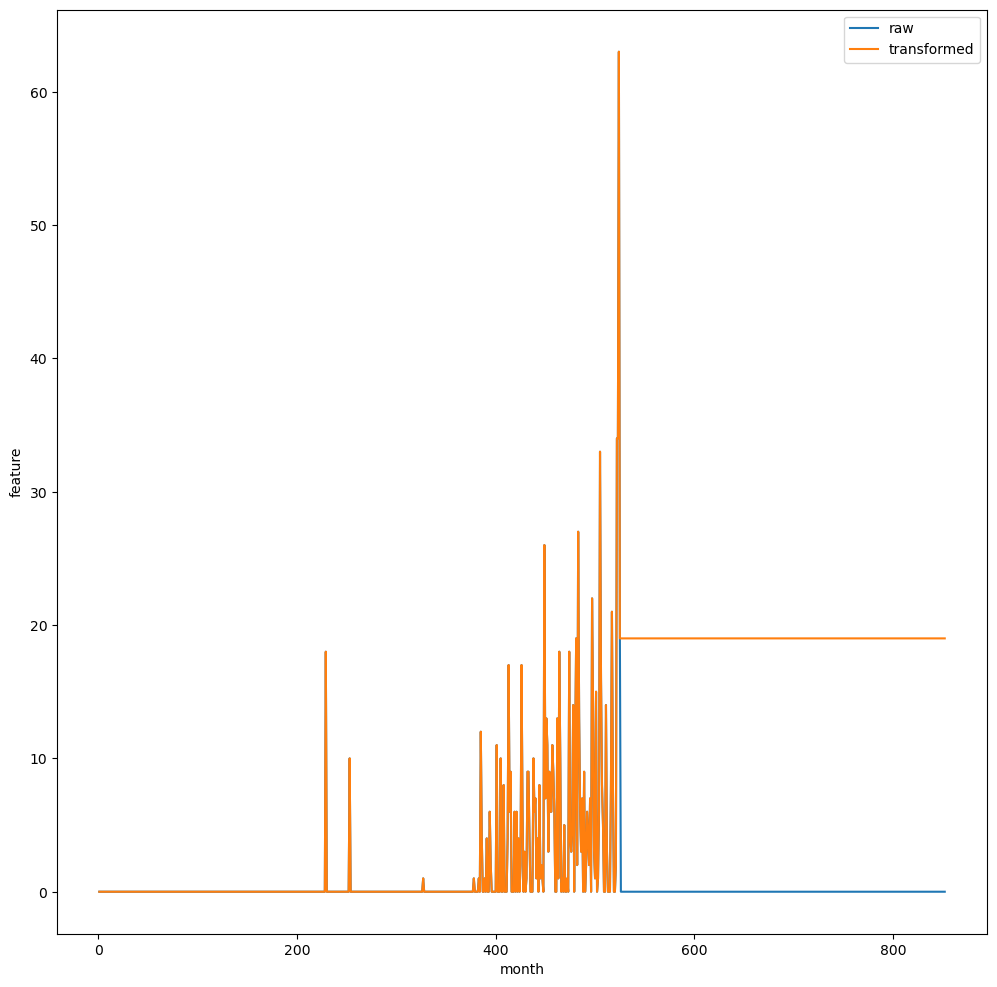

In [161]:
indx=data_raw_cm.index

tmin=indx.min(axis=0)
tmax=indx.max(axis=0)
tmin=tmin[0]
tmax=tmax[0]+1

times_full=range(tmin,tmax)

plt.plot(times_full,data_raw_cm.loc[(slice(None), countryid), :].values.reshape(len(times_full)))
plt.plot(times_full,data_extrapolate.loc[(slice(None), countryid), :].values.reshape(len(times_full)))

plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')

# Spatial transforms

<a id='spatial.lag'></a>
## spatial.lag

The spatial.lag transform is __kernel-based__, meaning that, at every pgm cell location, a square kernel of a finite size centred on that cell and the values of the feature inside the square are added up (usually ignoring the value of the target cell itself), weighted by distance from the cell (if required) and normalised (if required). The size of the square determines the maximum range that events can exert an influence over. 

The size of the square is specified by two numbers - the inner limit of the kernel (cells inside the inner limit are ignored, so setting the inner limit to 1 ignores the target cell itself), and the outer limit=the inner limit plus the kernel width (cells outside the outer limit are ignored - if the outer limit is set to 2, the diameter of the kernel square will be 5 cells - the target cell, and +/- two cells in each direction). __Be warned that setting the size of kernel to be a large number (more than 10, say) is likely to result in long runtimes!__

The kernel power is the power used to weight kernel cells by distance from the target cell, according to weight=distance**(-power). Setting to zero results in no distance weighting.

[Menu](#Menu)

In [162]:
#! Display usage and documentation for a transform
!viewser transforms show priogrid_month/spatial.lag


  >> Function description

  Docstring:
  "spatial_lag
  
  Performs convolutional spatial lags on a pg dataframe by transforming from flat 
  format to 4d tensor with dimensions longitude x latitude x time x features.
  
  Spatial lagging can then be done as a 2d convolution on long-lat slices using
  scipy convolution algorithms.
  
  Arguments:
  
  df:                a dataframe of series to be splagged
  
  use_stride_tricks: boolean, decide to use stride_tricks or not (optional,
                     defaults to True)
  
  kernel_inner:      inner border of convolution region (set to 1 to exclude central
                     cell)
  
  kernel_width:      width in cells of kernel, so outer radius of kernel =
                     kernel_inner + kernel_width
  
  kernel_power:      weight values of cells by (distance from centre of kernel)**
                     (-kernel_power) - set to zero for no distance weighting
  
  norm_kernel:       set to 1 to normalise kernel weights"
   


The simplest form of kernel-based spatial lag is to do an unweighted sum over the eight cells surrounding every cell, in which case kernel_inner is 1, kernel_width is 1, and the other parameters are zero:

In [163]:
kernel_inner=1
kernel_width=1
kernel_power=0
norm_kernel=0

In [164]:
queryset = (Queryset("jim_transform_test_splag", "priogrid_month")
 
            # target variable
            .with_column(Column("splag_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.lag(kernel_inner,kernel_width,kernel_power,norm_kernel)
                        )
            )  

In [165]:
%%time
data_splag = queryset.publish().fetch()
print(data_splag)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O                        splag_ged_sb
month_id priogrid_gid              
1        62356                  0.0
         79599                  0.0
         79600                  0.0
         79601                  0.0
         80317                  0.0
...                             ...
852      190496                 0.0
         190507                 0.0
         190508                 0.0
         190510                 0.0
         190511                 0.0

[11169720 rows x 1 columns]
CPU times: user 691 ms, sys: 366 ms, total: 1.06 s
Wall time: 56.7 s


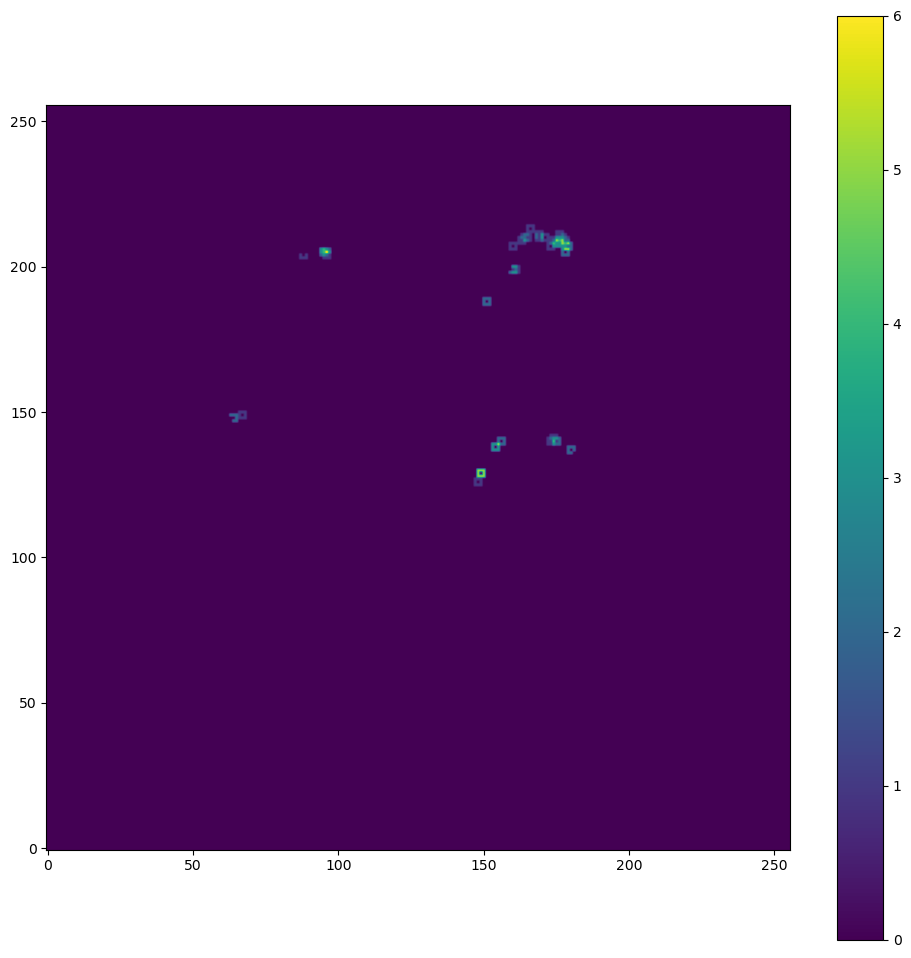

In [166]:
tensor=utilities._df_to_datacube(data_splag,True)
plt.imshow(tensor[:,:,199,0].T,origin='lower')
plt.colorbar()
plt.show()

If we wanted to include the target cell in the summation, we could do:

In [167]:
kernel_inner=0
kernel_width=2
kernel_power=0
norm_kernel=0

In [168]:
queryset = (Queryset("jim_transform_test_splag", "priogrid_month")
 
            # target variable
            .with_column(Column("splag_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.lag(kernel_inner,kernel_width,kernel_power,norm_kernel)
                        )
            ) 

In [169]:
%%time
data_splag = queryset.publish().fetch()
print(data_splag)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o                          splag_ged_sb
month_id priogrid_gid              
1        62356                  0.0
         79599                  0.0
         79600                  0.0
         79601                  0.0
         80317                  0.0
...                             ...
852      190496                 0.0
         190507                 0.0
         190508                 0.0
         190510                 0.0
         190511                 0.0

[11169720 rows x 1 columns]
CPU times: user 829 ms, sys: 377 ms, total: 1.21 s
Wall time: 55.4 s


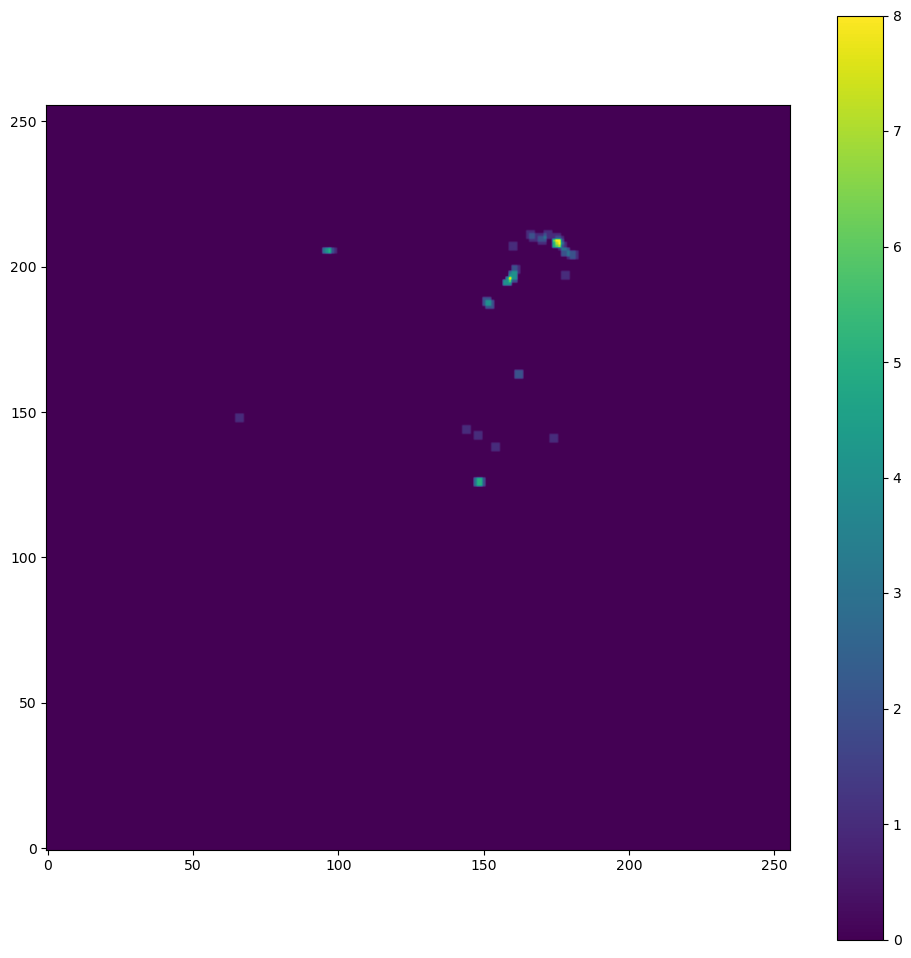

In [170]:
tensor=utilities._df_to_datacube(data_splag,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower')
plt.colorbar()
plt.show()

We might instead want to use a bigger kernel, with distance weighting:

In [171]:
kernel_inner=1
kernel_width=5
kernel_power=1
norm_kernel=0

In [172]:
queryset = (Queryset("jim_transform_test_splag", "priogrid_month")
 
            # target variable
            .with_column(Column("splag_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.lag(kernel_inner,kernel_width,kernel_power,norm_kernel)
                        )
            )

In [173]:
%%time
data_splag = queryset.publish().fetch()
print(data_splag)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .                           splag_ged_sb
month_id priogrid_gid              
1        62356                  0.0
         79599                  0.0
         79600                  0.0
         79601                  0.0
         80317                  0.0
...                             ...
852      190496                 0.0
         190507                 0.0
         190508                 0.0
         190510                 0.0
         190511                 0.0

[11169720 rows x 1 columns]
CPU times: user 1.03 s, sys: 503 ms, total: 1.54 s
Wall time: 1min 12s


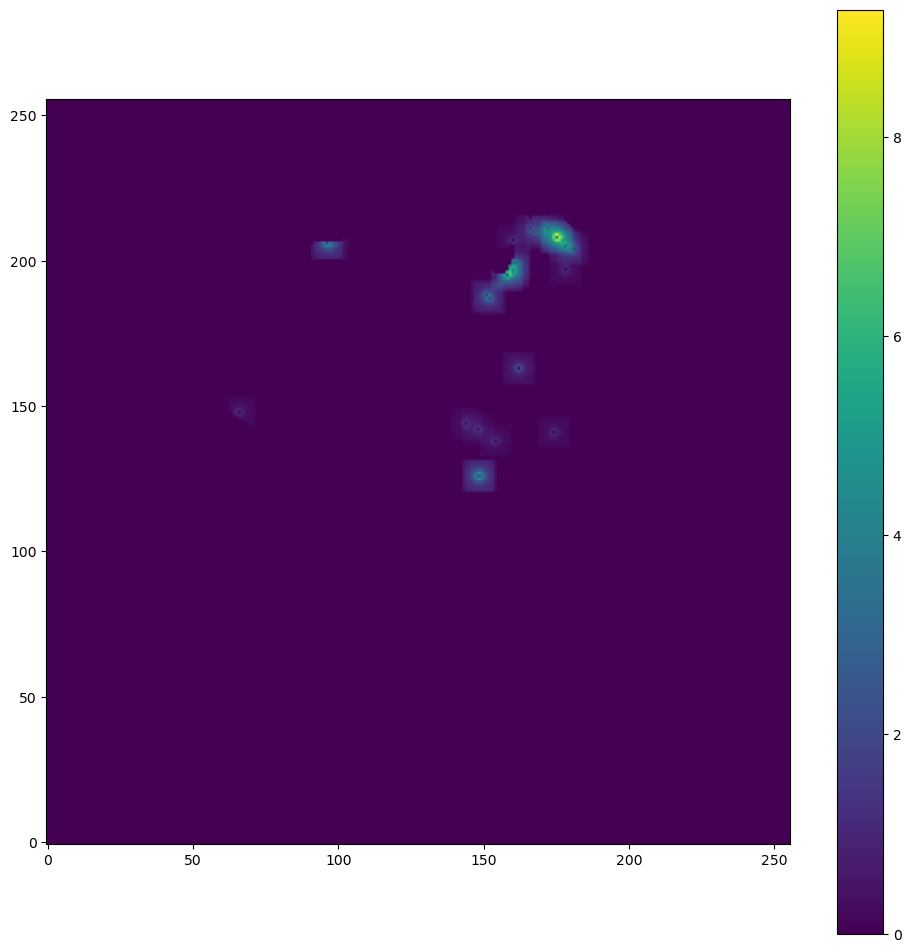

In [174]:
tensor=utilities._df_to_datacube(data_splag,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower')
plt.colorbar()
plt.show()

<a id='spatial.treelag'></a>
## spatial.treelag

The spatail.treelag transform is mainly different from the ordinary spatial lag in that there is no kernel - an approximate weighted sum over the __whole pg grid__ is computed at every grid cell (ignoring the target cell itself). This is done by hierarchically aggregating cells into groups, with cells further away from the target cell being aggregated into larger groups than those nearby. 

The parameter that controls how aggressively the aggregation is done is termed thetacrit. Smaller values of thetacrit decrease aggregation, making the summation more accurate, but slower.

Since a weighting over the whole grid is done, there must be a distance weighting, with a choice of three weighting functions: ln(1+d), d**-1, d**-2.

[Menu](#Menu)

In [175]:
#! Display usage and documentation for a transform
!viewser transforms show priogrid_month/spatial.treelag


  >> Function description

  Docstring:
  "spatial_tree_lag
  
  Performs spatial lags on a pg dataframe using a two-dimensional tree 
  
  Arguments:
  
  df: dataframe containing one or more features to be lagged
  
  thetacrit: opening angle used to decide whether to open nodes - large values cause more
  aggressive aggregation of nodes
  
  dfunction_option: an integer selecting which distance weighting to use:
  
                   - 0: ln(1+d) weighting
  
                   - 1: 1/d weighting
  
                   - 2: 1/d^2 weighting"
   
  Spatial.treelag takes 2 argument(s):
  - thetacrit (<class 'inspect._empty'>)
  - dfunction_option (<class 'inspect._empty'>)
   
  This transform can only be applied to data of type priogrid_month
  -----------------------------------------------------------------------------------------



Let's try the ln(1+d) scaling first - of the three weighting functions, this gives the most weight to __long-distance__ interactions.

In [176]:
thetacrit=0.7
dfunction_option=0

In [177]:
queryset = (Queryset("jim_transform_test_sp_tree_lag", "priogrid_month")
 
            # target variable
            .with_column(Column("sp_tree_lag_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.treelag(thetacrit,dfunction_option)
                        )
            )  

In [178]:
%%time
data_tree_splag = queryset.publish().fetch()
print(data_tree_splag)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o                          sp_tree_lag_ged_sb
month_id priogrid_gid                    
1        62356                        0.0
         79599                        0.0
         79600                        0.0
         79601                        0.0
         80317                        0.0
...                                   ...
852      190496                       0.0
         190507                       0.0
         190508                       0.0
         190510                       0.0
         190511                       0.0

[11169720 rows x 1 columns]
CPU times: user 1.06 s, sys: 596 ms, total: 1.66 s
Wall time: 1min 10s


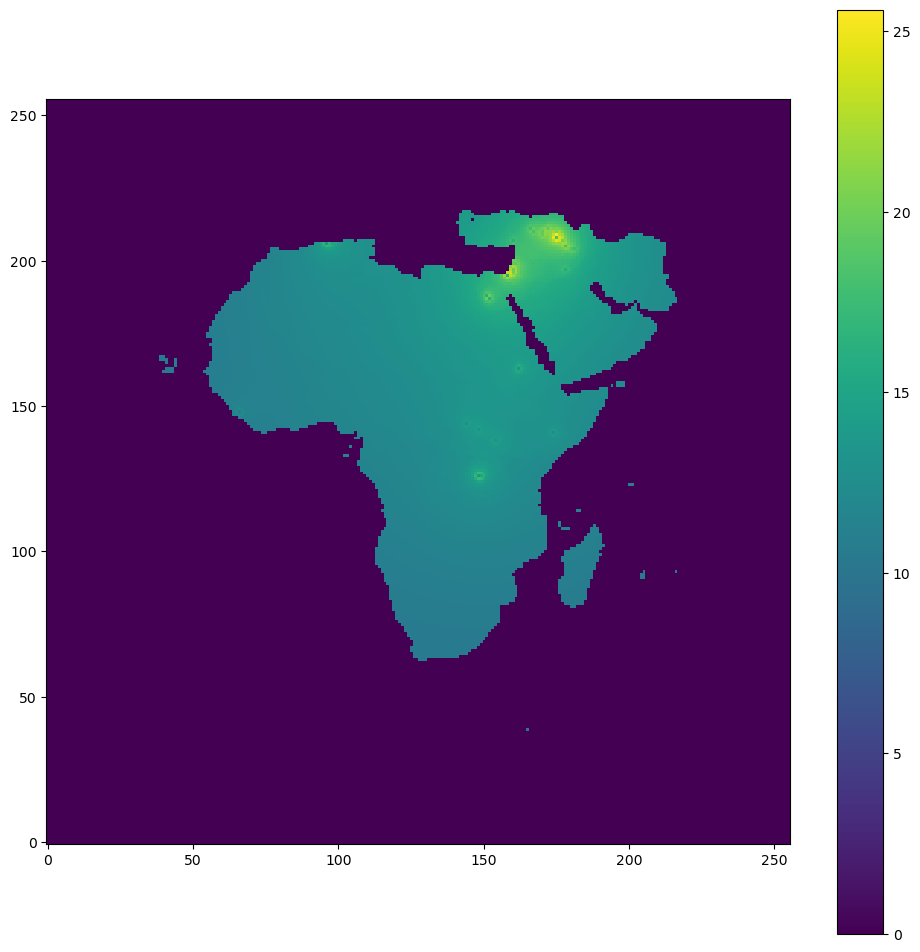

In [179]:
tensor=utilities._df_to_datacube(data_tree_splag,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

We see that that the map looks very smooth, since the conflct features have been smeared out over large distances.

Let's see what we get with the 1/d scaling:

In [180]:
thetacrit=0.7
dfunction_option=1

In [181]:
queryset = (Queryset("jim_transform_test_sp_tree_lag", "priogrid_month")
 
            # target variable
            .with_column(Column("sp_tree_lag_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.treelag(thetacrit,dfunction_option)
                        )
            )  

In [182]:
%%time
data_tree_splag = queryset.publish().fetch()
print(data_tree_splag)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O                        sp_tree_lag_ged_sb
month_id priogrid_gid                    
1        62356                        0.0
         79599                        0.0
         79600                        0.0
         79601                        0.0
         80317                        0.0
...                                   ...
852      190496                       0.0
         190507                       0.0
         190508                       0.0
         190510                       0.0
         190511                       0.0

[11169720 rows x 1 columns]
CPU times: user 1.13 s, sys: 608 ms, total: 1.74 s
Wall time: 1min 5s


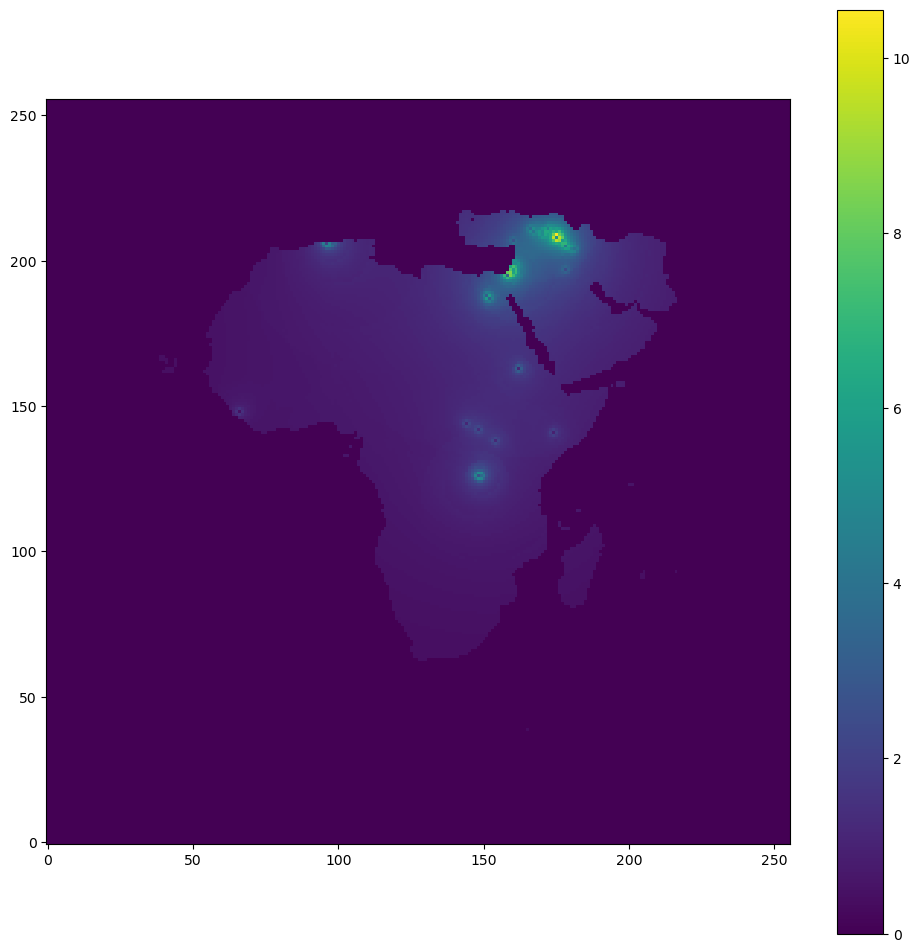

In [183]:
tensor=utilities._df_to_datacube(data_tree_splag,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

As expected, this weighting gives less power to long-distance interactions.

We will now try with 1/d$^{2}$:

In [184]:
thetacrit=0.7
dfunction_option=2

In [185]:
queryset = (Queryset("jim_transform_test_sp_tree_lag", "priogrid_month")
 
            # target variable
            .with_column(Column("sp_tree_lag_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.treelag(thetacrit,dfunction_option)
                        )
            ) 

In [186]:
%%time
data_tree_splag = queryset.publish().fetch()
print(data_tree_splag)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O                        sp_tree_lag_ged_sb
month_id priogrid_gid                    
1        62356                        0.0
         79599                        0.0
         79600                        0.0
         79601                        0.0
         80317                        0.0
...                                   ...
852      190496                       0.0
         190507                       0.0
         190508                       0.0
         190510                       0.0
         190511                       0.0

[11169720 rows x 1 columns]
CPU times: user 1.18 s, sys: 754 ms, total: 1.93 s
Wall time: 1min 5s


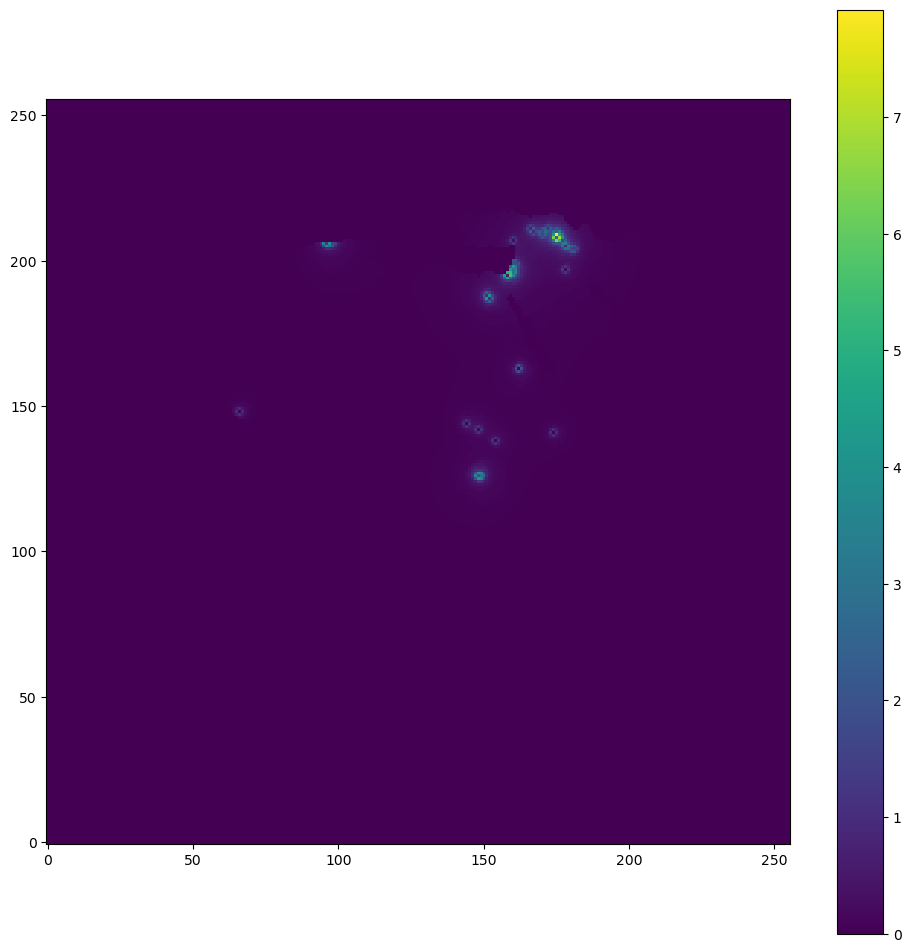

In [187]:
tensor=utilities._df_to_datacube(data_tree_splag,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

Now we see that the transformed feature is non-zero only close to the events.

<a id='spatial.spacetime_distance'></a>
## spatial.spacetime_distance

This transform computes, for every pg cell for every timestep in the input dataframe, the __spacetime distance__ to the nearest _k_ __present or past__ 'events', where an event is any (pg cell,timestep) which has a non-zero value of the input feature. 
For $k=1$, at every (pg cell, timestep) with coordinates $x_{i},y_{i},t_{i}$, the transform locates the event with coordinates $x_{e},y_{e},t_{e}$ for which $s^{2}=([x_{i}-x_{e}]^{2}+[y_{i}-y_{e}]^{2}+\nu^{2}[t_{i}-t_{e}]^{2})$, subject to $t_{i}\ge t_{e}$ and with $\nu$ an arbitrary scale factor with dimensions of velocity, is minimised. If there are no such events, $s$ defaults to a value of 999.0.

If 'return_values' is set to 'distances', the value of $s$ is returned.

If 'return_values' is set to 'weights', the value of $f_{e}s^{-power}$ is returned where $f_{e}$ is the value of the feature at the event $x_{e},y_{e},t_{e}$.

For $k\gt 1$, the nearest $k$ events are located, and the average value $\langle s \rangle$ is computed. 

If 'return_values' is set to 'distances', the value of $\langle s \rangle$ is returned.

If 'return_values' is set to 'weights', the value of $\langle f_{e}\rangle \langle s \rangle^{-power}$ is returned where $\langle f_{e} \rangle $ is the average value of the feature over the $k$ closest events.

[Menu](#Menu)

In [188]:
return_values='distances'
k=1
nu=1.0
power=0.0

In [189]:
queryset = (Queryset("jim_transform_test_sptime_dist", "priogrid_month")
 
            # target variable
            .with_column(Column("stdist_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.sptime_dist(return_values,k,nu,power)
                        )
            )

In [190]:
%%time
data_sptime_dist = queryset.publish().fetch()
print(data_sptime_dist)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O     

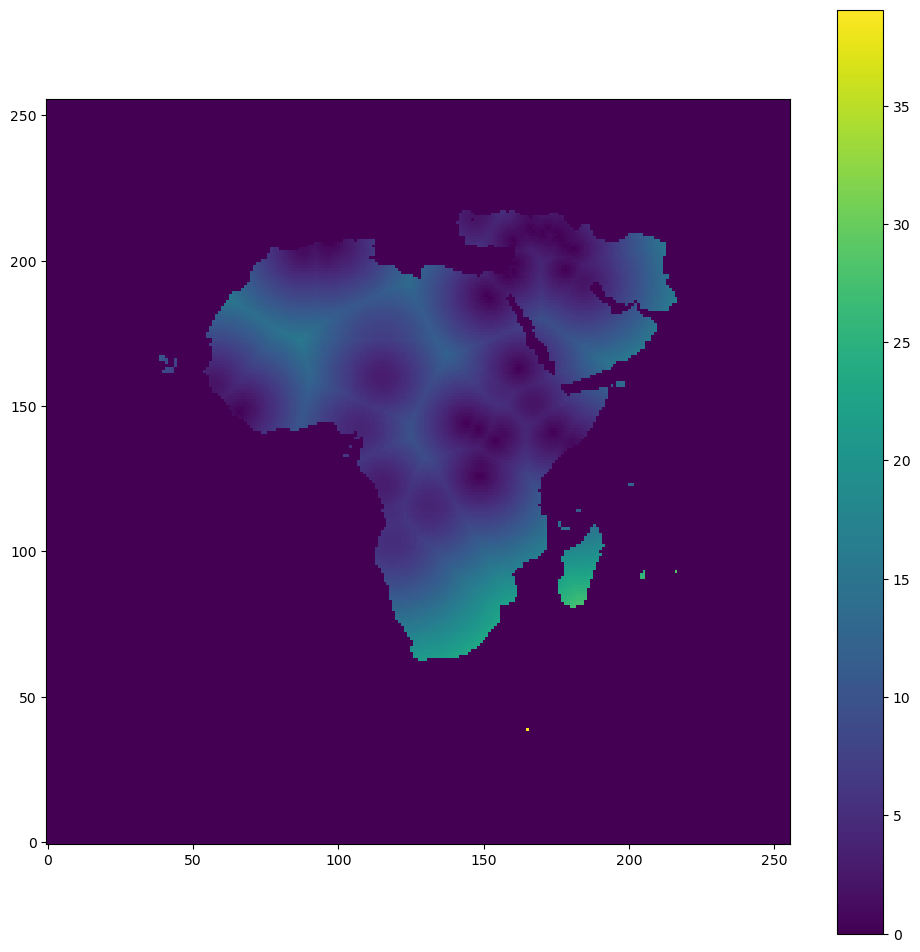

In [191]:
tensor=utilities._df_to_datacube(data_sptime_dist,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

This returns a map resembling a Voronoi tesselation.

If we increase the value of $\nu$, we make time-differences __longer__ so the closest event to a given (pg, time) is likely to be at a the same timestep).

In [192]:
return_values='distances'
k=1
nu=10.0
power=1.0

In [193]:
queryset = (Queryset("jim_transform_test_sptime_dist", "priogrid_month")
 
            # target variable
            .with_column(Column("stdist_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.sptime_dist(return_values,k,nu,power)
                        )
            )

In [194]:
%%time
data_sptime_dist = queryset.publish().fetch()
print(data_sptime_dist)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O     

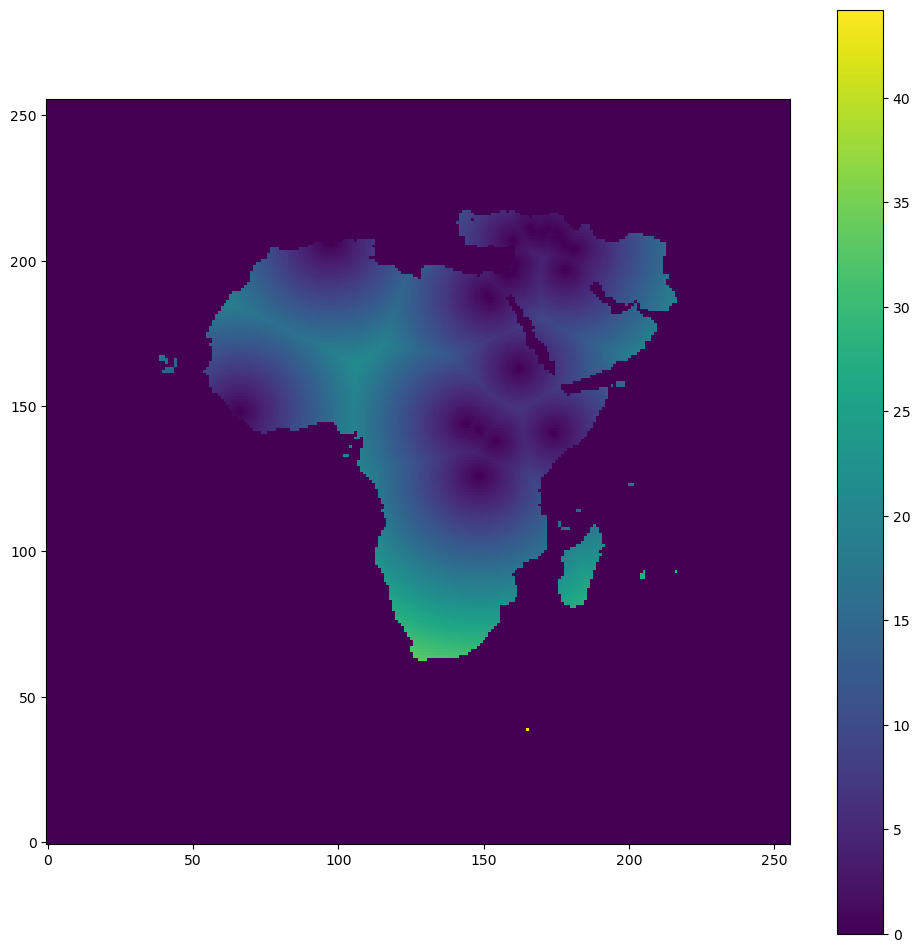

In [195]:
tensor=utilities._df_to_datacube(data_sptime_dist,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

If we instead make $\nu$ small, this compresses the time axis, so that the nearest event to any particular (pg,time) could be at a wide range of timesteps.

In [196]:
return_values='distances'
k=1
nu=0.01
power=1.0

In [197]:
queryset = (Queryset("jim_transform_test_sptime_dist", "priogrid_month")
 
            # target variable
            .with_column(Column("stdist_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.sptime_dist(return_values,k,nu,power)
                        )
            )

In [198]:
%%time
data_sptime_dist = queryset.publish().fetch()
print(data_sptime_dist)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O     

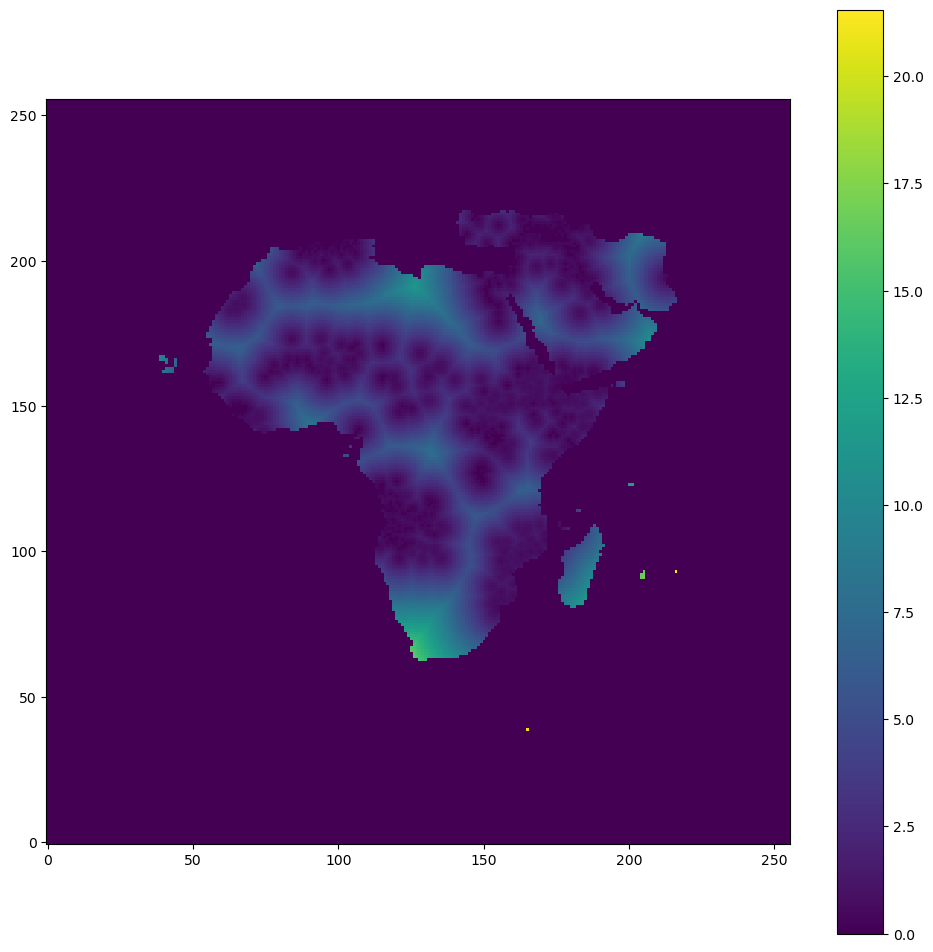

In [199]:
tensor=utilities._df_to_datacube(data_sptime_dist,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

Alternatively, we can compute the weigthed effect of the nearest event, weighted by the size of the event and the distance^power:

In [200]:
return_values='weights'
k=1
nu=1.0
power=1.0

In [201]:
queryset = (Queryset("jim_transform_test_sptime_dist", "priogrid_month")
 
            # target variable
            .with_column(Column("stdist_ged_sb", from_table = pgm_table, from_column = pgm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.sptime_dist(return_values,k,nu,power)
                        )
            )

In [202]:
%%time
data_sptime_dist = queryset.publish().fetch()
print(data_sptime_dist)

 .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O      o       .      o      O      O     

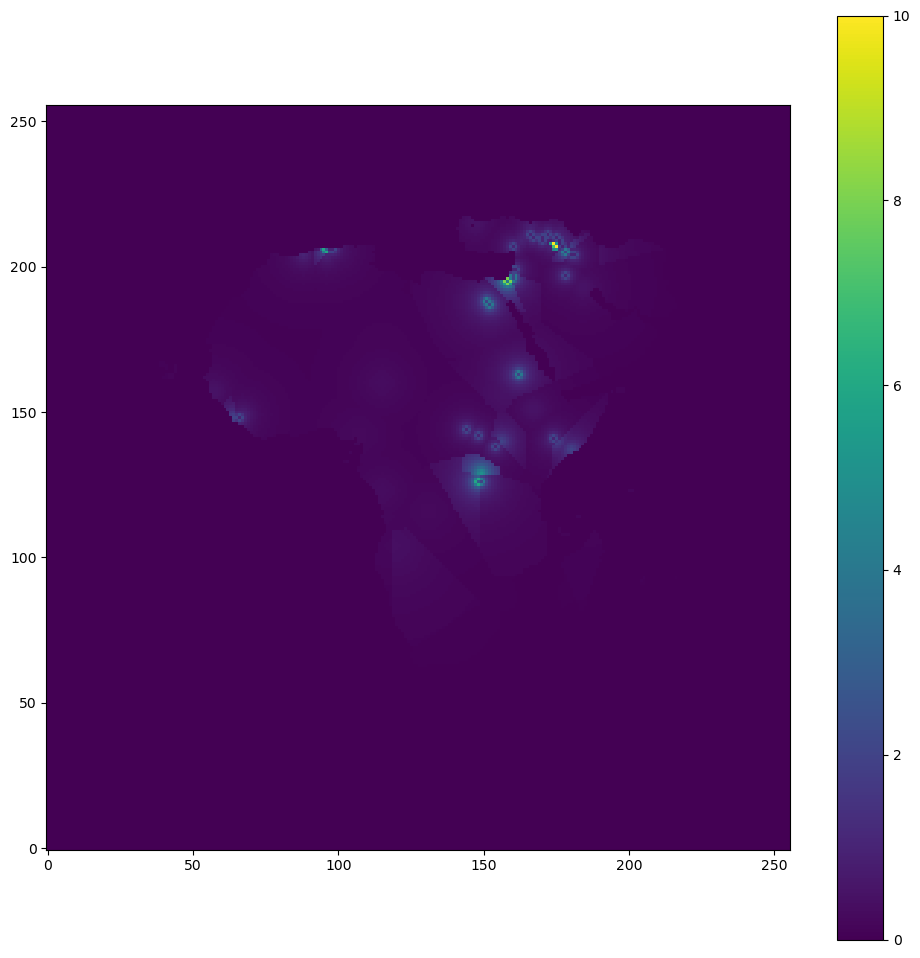

In [203]:
tensor=utilities._df_to_datacube(data_sptime_dist,True)
plt.imshow(tensor[:,:,200,0].T,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

<a id='spatial.countrylag'></a>
## spatial.countrylag

This transform preforms spatial lags at the country-level. 
It works in a similar way to spatial.lag, by placing a kernel at the location of each country and summing the values of neighbouring countries within the kernel. The kernel inner radius and with are specified in units of 'country'. An inner radius of 0 indicates that the sum should include the target country itself, 1 indicates that the target country should be left out of the sum, 2 indicates that the target country and its neighbours are left out of the sum, etc.
The kernel width is also specified in units of countries. 
The transform takes a third argument which is the power to be used in weighting by distance (using the distances between the centroids of neighbouring countries and the centroid of the target country).
The fourth argument is a flag indicating whether the distance weights are to be normalised.

[Menu](#Menu)

In [204]:
#! Display usage and documentation for a transform
!viewser transforms show country_month/spatial.countrylag


  >> Function description

  Docstring:
  "spatial_lag_country
  
  Performs convolutional spatial lags on a country dataframe. 
  
  Country neighbours are obtained from the country_country_month_expanded table
  in the database.
  
  Arguments:
  
  df:             a dataframe of series to be splagged
  
  kernel_inner:   'radius' in countries where you wish to start collecting neighbours 
                  - 0 indicates that you include the target country, 1 indicates that 
                  you leave out the target country, 2 indicates that you leave out the 
                  target country and its neighbours, and so on.
  
  kernel_width:   how far out in countries from the inner radius you wish to go. For 
                  example, to get just the immediate neighbours but not the target 
                  country, set kernel_inner to 1, kernel_width to 1. To get neighbours 
                  of neighbours as well, set kernel_inner to 1, kernel_width to 2.   
  
  kernel_power:

In [205]:
queryset = (Queryset("jim_transform_test_splag_cm", "country_month")
 
            # target variable
            .with_column(Column("decay_ged_sb", from_table = cm_table, from_column = cm_column)
                         .transform.missing.replace_na()
                         .transform.spatial.countrylag(1,1,0,0)
                        )
            )    

In [206]:
data_splag_c = queryset.publish().fetch()
print(data_splag_c)

 .      o                        decay_ged_sb
month_id country_id              
1        1                    0.0
         2                    0.0
         3                    0.0
         4                    0.0
         5                    0.0
...                           ...
852      242                  0.0
         243                  0.0
         244                  0.0
         245                  0.0
         246                  0.0

[158230 rows x 1 columns]


In [207]:
c=Country(countryid)
print(c.name)

Kenya


In [208]:
neighbs=[]
for imonth in range(t0,t1):
    if len(neighbs)==0:
        for n in c.neighbors(imonth):
            nid=n.id
            if nid not in neighbs:
                neighbs.append(nid)
    else:
        for n in c.neighbors(imonth):
            nid=n.id
            if nid not in neighbs:
                print('WARNING - COUNTRY NEIGHBOURS CHANGED IN TIME INTERVAL - RESULTS DIFFICULT TO INTERPRET!')
for n in neighbs:
    print(n, Country(n).name)

57 Ethiopia
59 Sudan
120 Somalia
235 Uganda
242 Tanzania


Text(0, 0.5, 'feature')

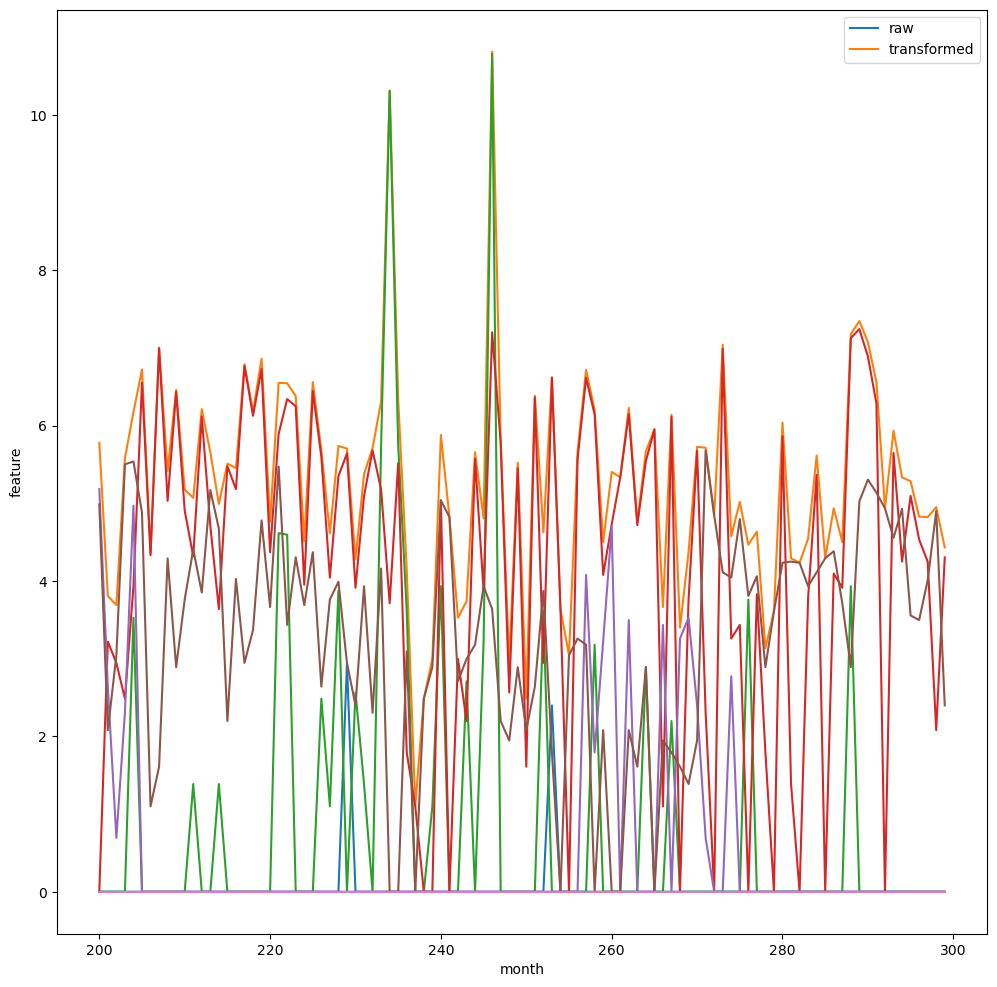

In [209]:
plt.plot(times,np.log(1+data_raw_cm.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times))))
plt.plot(times,np.log(1+data_splag_c.loc[(slice(t0,t1-1), countryid), :].values.reshape(len(times))))

for n in neighbs:
    plt.plot(times,np.log(1+data_raw_cm.loc[(slice(t0,t1-1), n), :].values.reshape(len(times))))

plt.legend(['raw','transformed'])
plt.xlabel('month')
plt.ylabel('feature')